<a href="https://colab.research.google.com/github/Tanuka-Mondal/Fuzzy/blob/main/fuzzy_trapez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=df59cf7df2b3b1fa16b6eff8affc052ed22546fed447d0b480a24dd19d73bfe5
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [3]:
import matplotlib.pyplot as plt

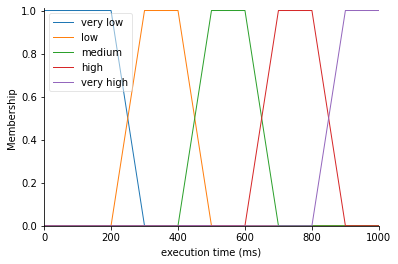

In [4]:
ei = ctrl.Antecedent(np.arange(0,1001,1),'execution time (ms)') #mili second
ei['very low'] = fuzzy.trapmf(ei.universe,[0,0,200,300])
ei['low'] = fuzzy.trapmf(ei.universe,[200,300,400,500])
ei['medium'] = fuzzy.trapmf(ei.universe,[400,500,600,700])
ei['high'] = fuzzy.trapmf(ei.universe,[600,700,800,900])
ei['very high'] = fuzzy.trapmf(ei.universe,[800,900,1000,1000])
ei.view()

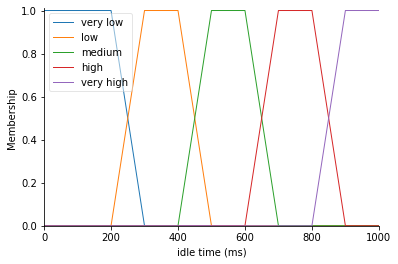

In [5]:
Ii = ctrl.Antecedent(np.arange(0,1001,1),'idle time (ms)')
Ii['very low'] = fuzzy.trapmf(Ii.universe,[0,0,200,300])
Ii['low'] = fuzzy.trapmf(Ii.universe,[200,300,400,500])
Ii['medium'] = fuzzy.trapmf(Ii.universe,[400,500,600,700])
Ii['high'] = fuzzy.trapmf(Ii.universe,[600,700,800,900])
Ii['very high'] = fuzzy.trapmf(Ii.universe,[800,900,1000,1000])
Ii.view()

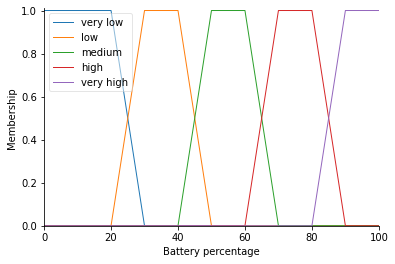

In [6]:
bi = ctrl.Antecedent(np.arange(0,101,1),'Battery percentage')
bi['very low'] = fuzzy.trapmf(bi.universe,[0,0,20,30])
bi['low'] = fuzzy.trapmf(bi.universe,[20,30,40,50])
bi['medium'] = fuzzy.trapmf(bi.universe,[40,50,60,70])
bi['high'] = fuzzy.trapmf(bi.universe,[60,70,80,90])
bi['very high'] = fuzzy.trapmf(bi.universe,[80,90,100,100])
bi.view()

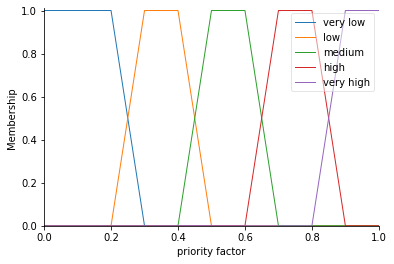

In [7]:
pi = ctrl.Antecedent(np.arange(0,1.1,0.1),'priority factor')
pi['very low'] = fuzzy.trapmf(pi.universe,[0,0,0.2,0.3])
pi['low'] = fuzzy.trapmf(pi.universe,[0.2,0.3,0.4,0.5])
pi['medium'] = fuzzy.trapmf(pi.universe,[0.4,0.5,0.6,0.7])
pi['high'] = fuzzy.trapmf(pi.universe,[0.6,0.7,0.8,0.9])
pi['very high'] = fuzzy.trapmf(pi.universe,[0.8,0.9,1,1])
pi.view()

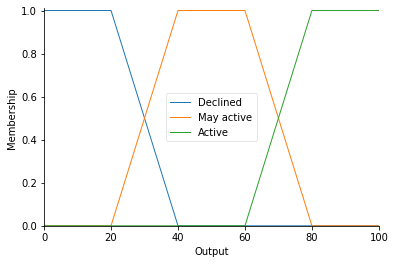

In [8]:
si = ctrl.Consequent(np.arange(0,101,1),'Output')
#names = ['Declined','May active','Active']
#si.automf(names = names)
si['Declined'] = fuzzy.trapmf(si.universe,[0,0,20,40])
si['May active'] = fuzzy.trapmf(si.universe,[20,40,60,80])
si['Active'] = fuzzy.trapmf(si.universe,[60,80,100,100])
si.view()

In [9]:
rule1 = ctrl.Rule(ei['very low'],si['Active'])
rule2 = ctrl.Rule(ei['low'],si['Active'])
rule3 = ctrl.Rule(ei['medium'],si['May active'])
rule4 = ctrl.Rule(ei['high'],si['Declined'])
rule5 = ctrl.Rule(ei['very high'],si['Declined'])
rule6 = ctrl.Rule(Ii['very low'] ,si['Declined'])
rule7 = ctrl.Rule(Ii['low'] ,si['Declined'])
rule8 = ctrl.Rule(Ii['medium'] ,si['May active'])
rule9 = ctrl.Rule(Ii['high'],si['Active'])
rule10 = ctrl.Rule(Ii['very high'],si['Active'])
rule11 = ctrl.Rule(pi['very low'] ,si['Declined'])
rule12 = ctrl.Rule(pi['low'] ,si['Declined'])
rule13 = ctrl.Rule(pi['medium'] ,si['May active'])
rule14 = ctrl.Rule(pi['high'],si['Active'])
rule15 = ctrl.Rule(pi['very high'],si['Active'])
rule16 = ctrl.Rule(bi['very low'] ,si['Declined'])
rule17 = ctrl.Rule(bi['low'] ,si['Declined'])
rule18 = ctrl.Rule(bi['medium'] ,si['May active'])
rule19 = ctrl.Rule(bi['high'],si['Active'])
rule20 = ctrl.Rule(bi['very high'],si['Active'])
rule21 = ctrl.Rule(ei['low'] & Ii['very low'],si['Declined'])
rule22 = ctrl.Rule(ei['medium'] & (Ii['very low'] | Ii['low']),si['Declined'])
rule23 = ctrl.Rule(ei['high'] & (Ii['very low'] | Ii['low'] | Ii['medium']),si['Declined'])
rule24 = ctrl.Rule(ei['very high'] & (Ii['very low'] | Ii['low'] | Ii['medium'] | Ii['high']),si['Declined'])


In [10]:
op = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24])
Sensor = ctrl.ControlSystemSimulation(op)

In [11]:
def SensorOutput():
  Sensor.input['execution time (ms)'] = float(input("execution time: "))
  Sensor.input['idle time (ms)'] = float(input("idle time: "))
  Sensor.input['priority factor'] = float(input("priority factor: "))
  Sensor.input['Battery percentage'] = float(input("battery percentage: "))
  Sensor.compute()
  #print(Tip.output['Output'])
  print("chance of activation of sensor: "+'{0:.6g}'.format(Sensor.output['Output']) + "%")
  ei.view(sim=Sensor)
  Ii.view(sim=Sensor)
  pi.view(sim=Sensor)
  bi.view(sim=Sensor)
  si.view(sim=Sensor)

execution time: 812
idle time: 927
priority factor: 1
battery percentage: 95
chance of activation of sensor: 51.744%


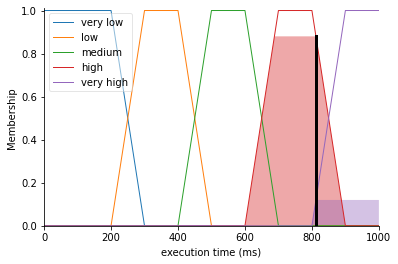

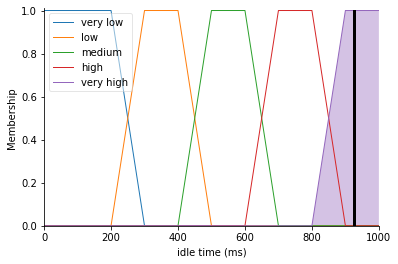

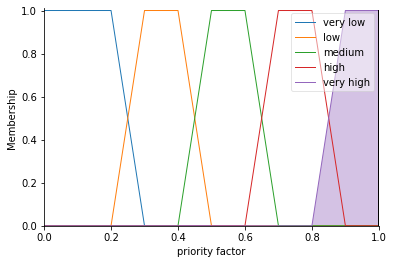

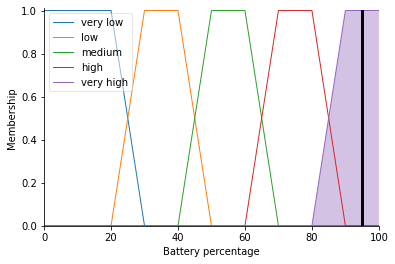

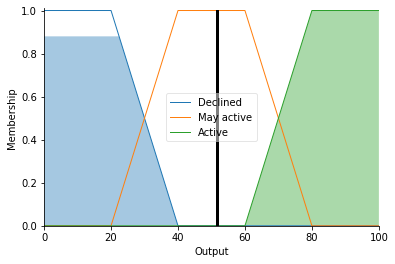

In [12]:
SensorOutput()

execution time: 872
idle time: 926
priority factor: 0.9
battery percentage: 63
chance of activation of sensor: 53.2454%


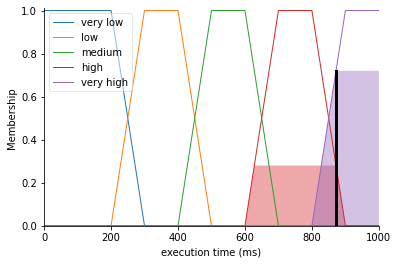

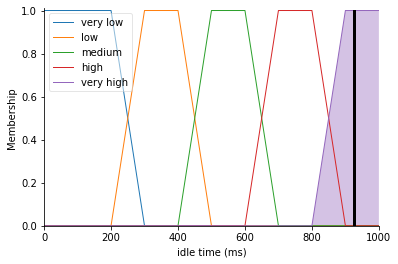

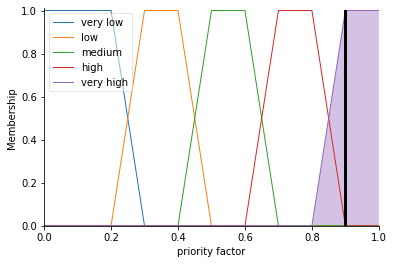

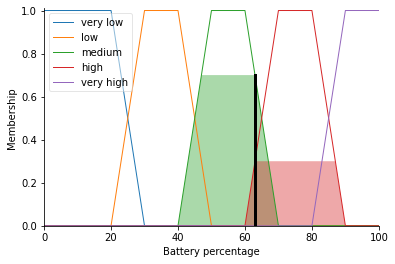

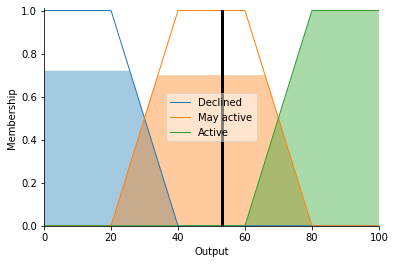

In [16]:
SensorOutput()

execution time: 56
idle time: 987
priority factor: 1
battery percentage: 98
chance of activation of sensor: 84.4444%


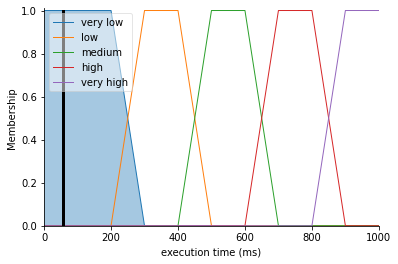

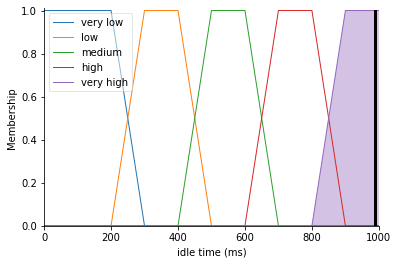

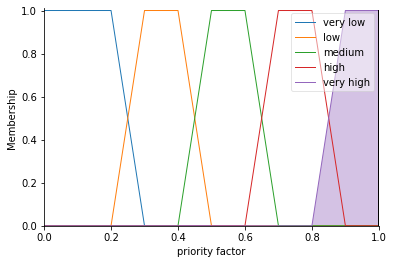

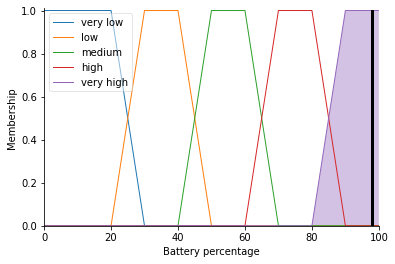

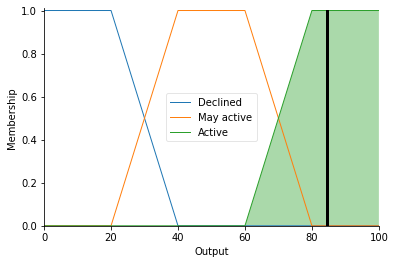

In [17]:
SensorOutput()

execution time: 879
idle time: 20
priority factor: 0.1
battery percentage: 15
chance of activation of sensor: 15.5556%


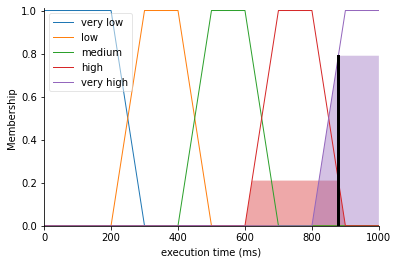

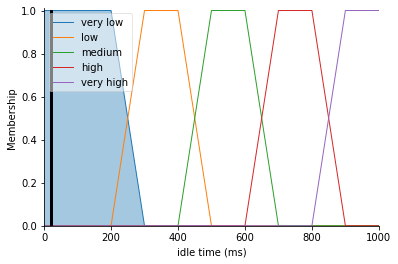

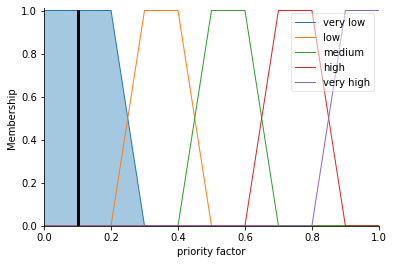

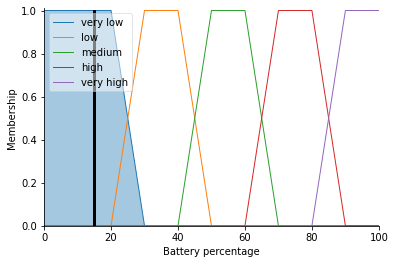

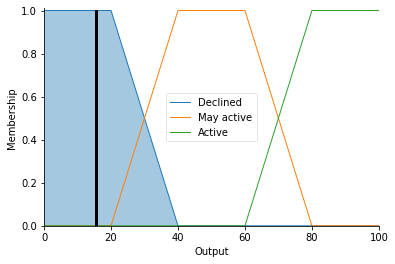

In [18]:
SensorOutput()


execution time: 950
idle time: 820
priority factor: 0.8
battery percentage: 52
chance of activation of sensor: 50%


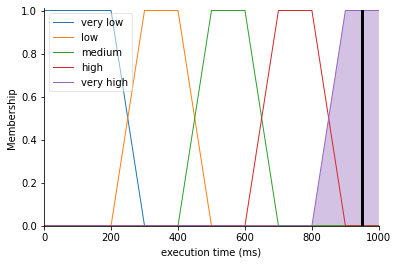

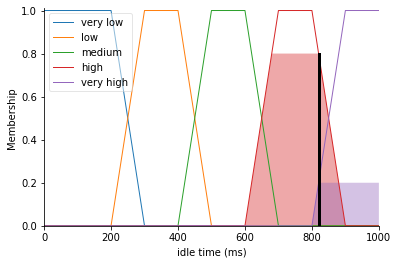

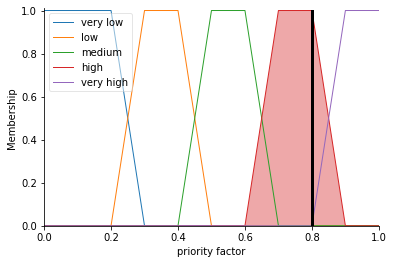

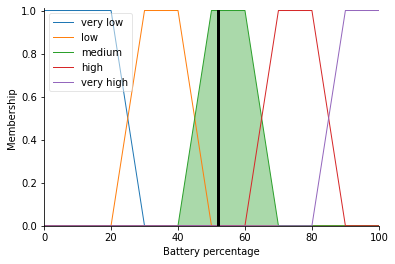

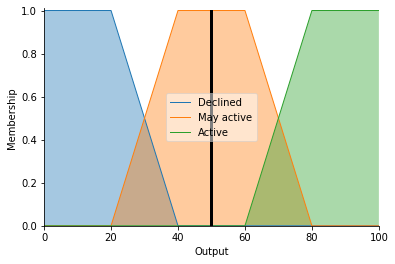

In [19]:
SensorOutput()

execution time: 850
idle time: 970
priority factor: 0.95
battery percentage: 25
chance of activation of sensor: 59.8246%


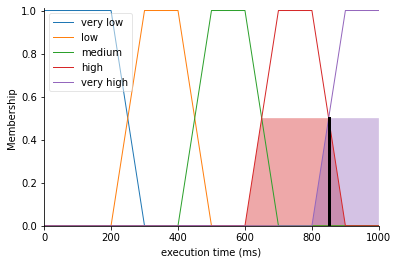

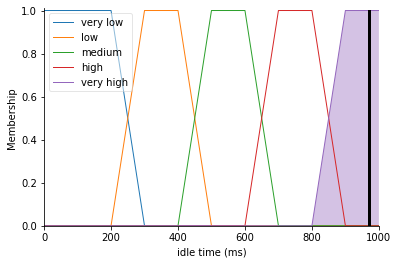

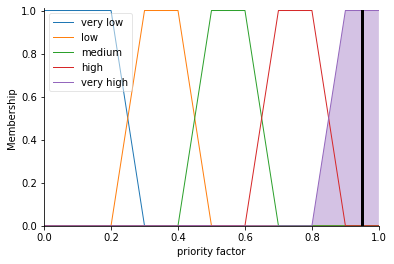

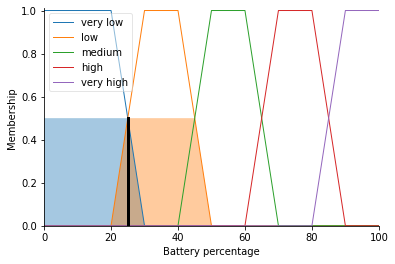

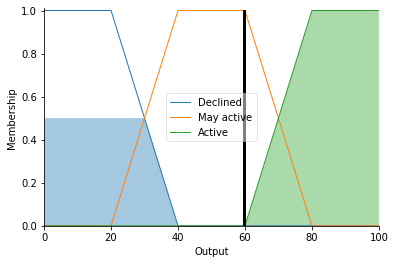

In [21]:
SensorOutput()

execution time: 863
idle time: 935
priority factor: 0.87
battery percentage: 18
chance of activation of sensor: 50%


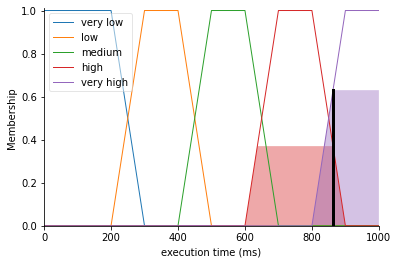

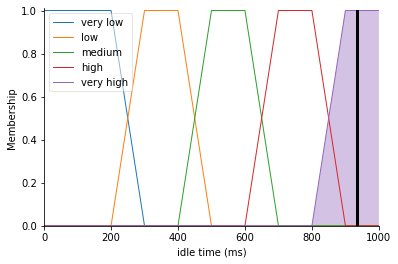

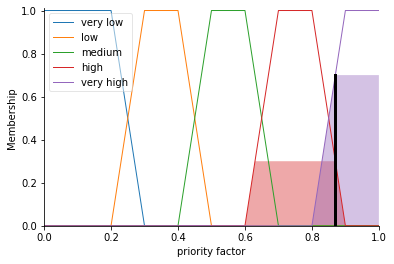

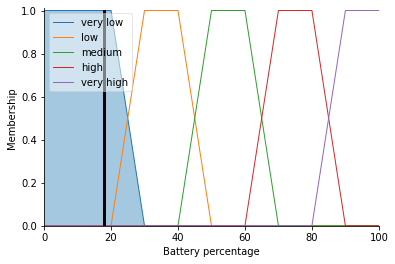

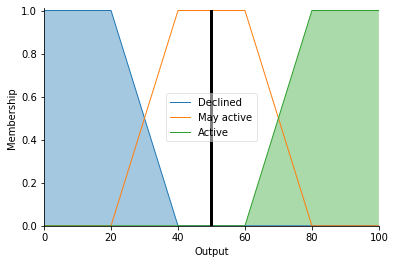

In [22]:
SensorOutput()

execution time: 50
idle time: 950
priority factor: 0.9
battery percentage: 98
chance of activation of sensor: 84.4444%


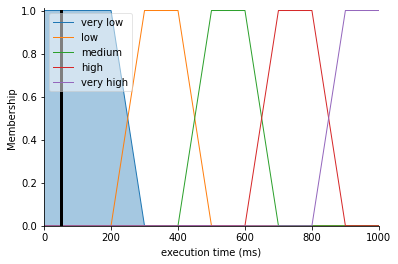

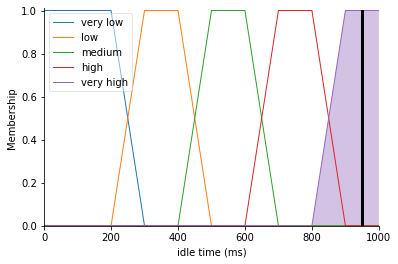

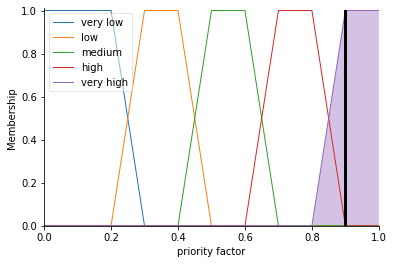

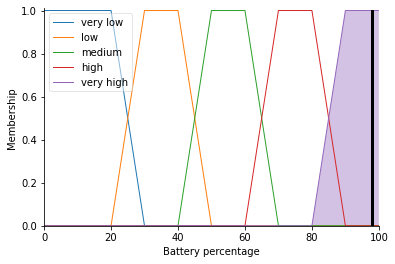

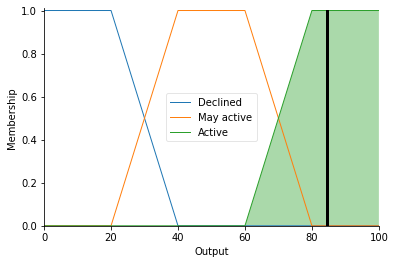

In [ ]:
SensorOutput()

execution time: 960
idle time: 880
priority factor: 0.6
battery percentage: 90
chance of activation of sensor: 50%


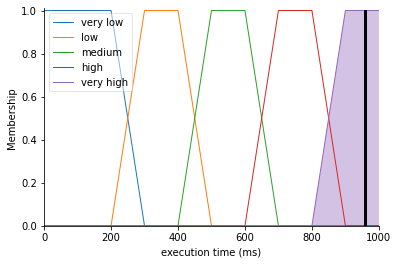

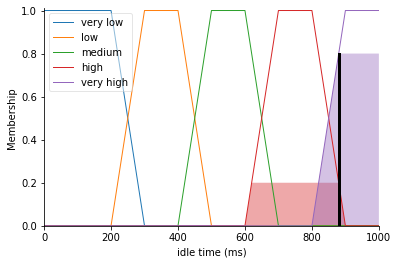

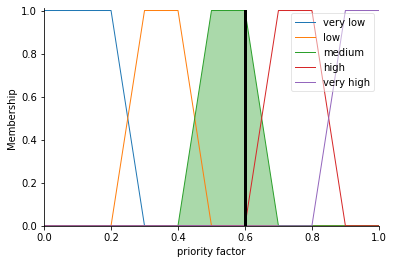

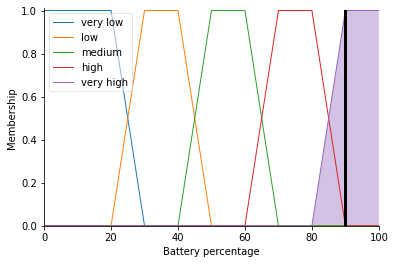

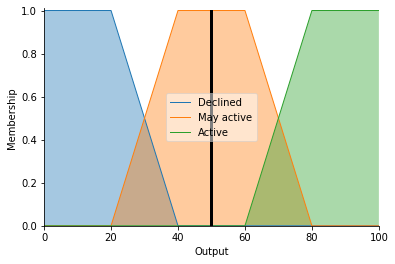

In [23]:
SensorOutput()

execution time: 870
idle time: 990
priority factor: 0.7
battery percentage: 65
chance of activation of sensor: 53.8943%


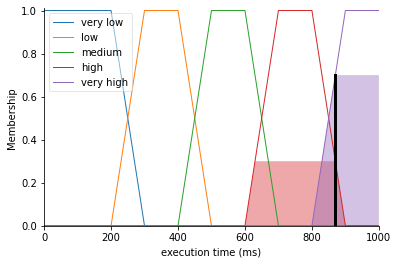

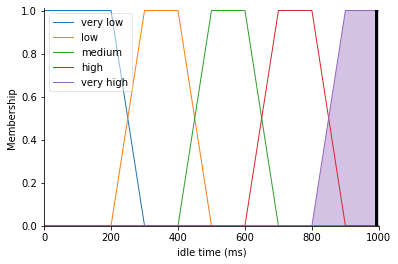

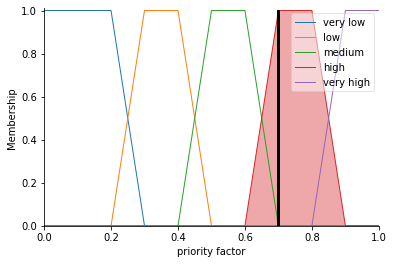

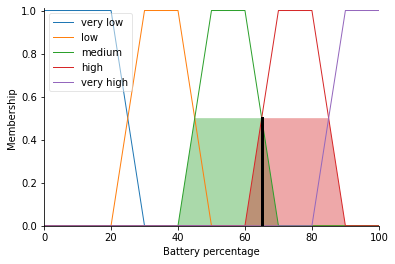

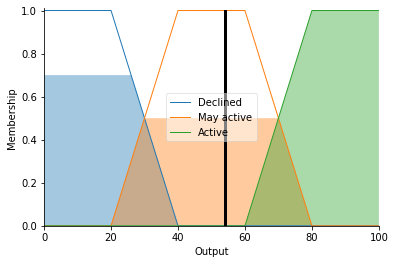

In [24]:
SensorOutput()

execution time: 800
idle time: 850
priority factor: 0.65
battery percentage: 50
chance of activation of sensor: 43.9785%


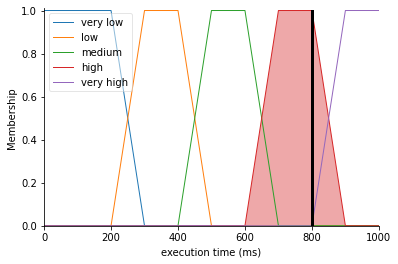

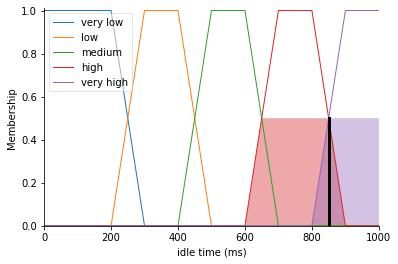

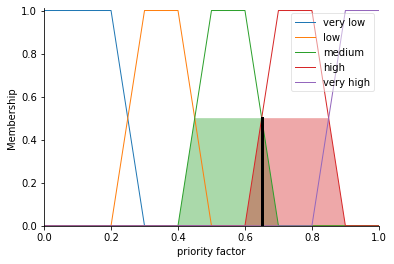

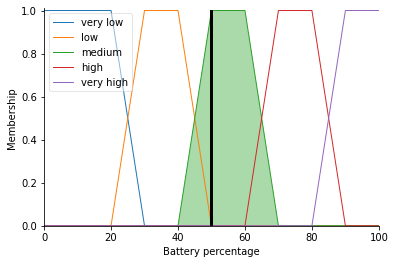

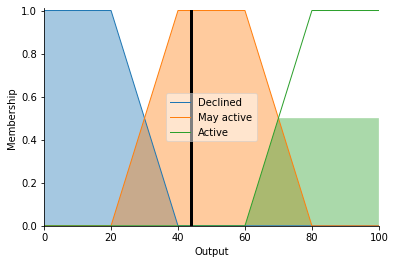

In [26]:
SensorOutput()

execution time: 860
idle time: 820
priority factor: 0.75
battery percentage: 25
chance of activation of sensor: 57.2169%


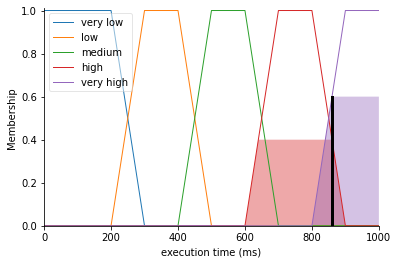

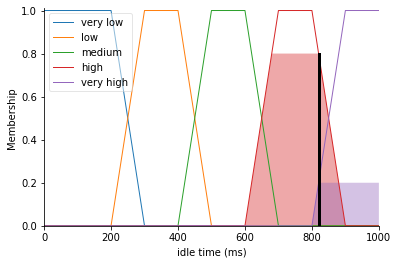

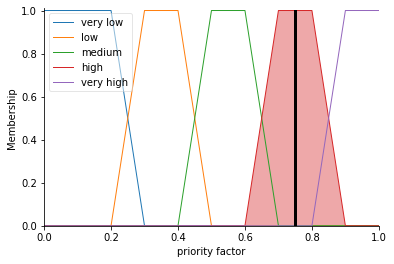

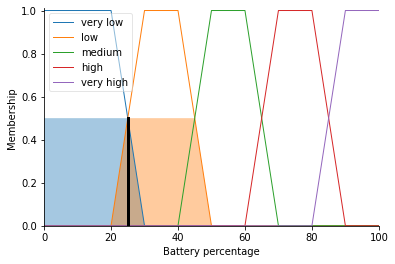

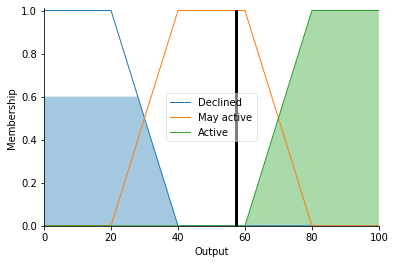

In [28]:
SensorOutput()

execution time: 910
idle time: 970
priority factor: 0.68
battery percentage: 17
chance of activation of sensor: 50%


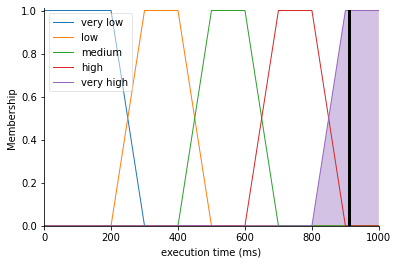

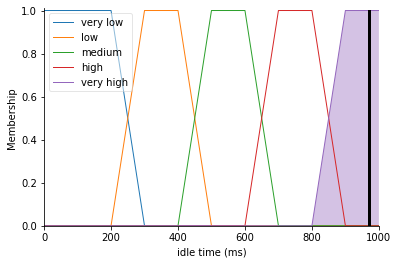

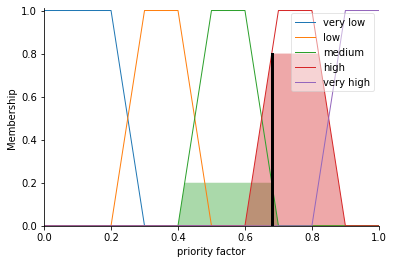

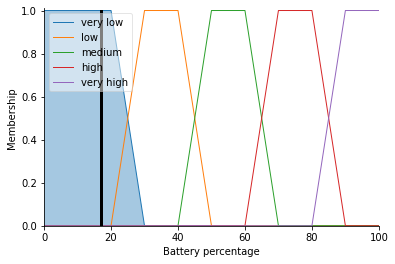

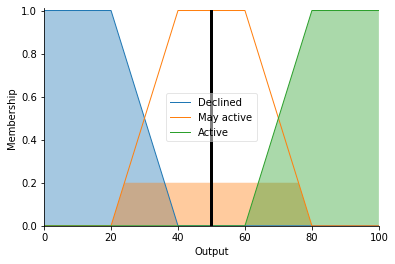

In [29]:
SensorOutput()

execution time: 950
idle time: 870
priority factor: 0.4
battery percentage: 95
chance of activation of sensor: 50%


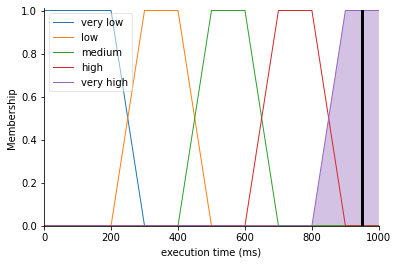

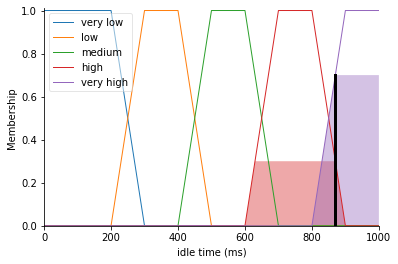

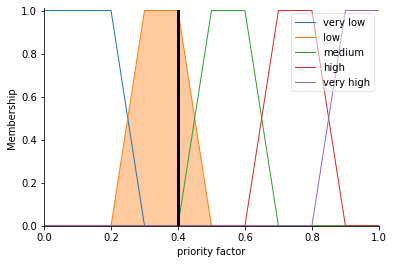

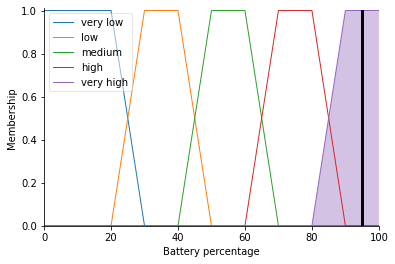

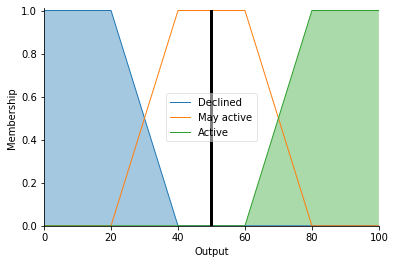

In [30]:
SensorOutput()

execution time: 810
idle time: 860
priority factor: 0.5
battery percentage: 64
chance of activation of sensor: 46.4138%


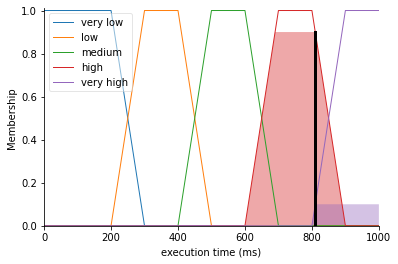

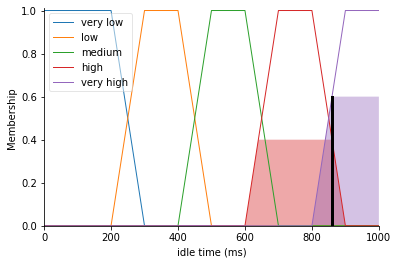

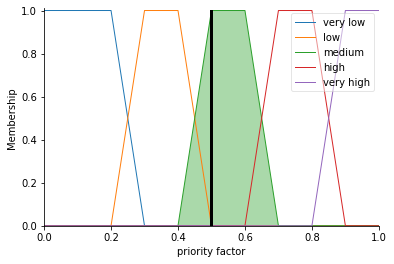

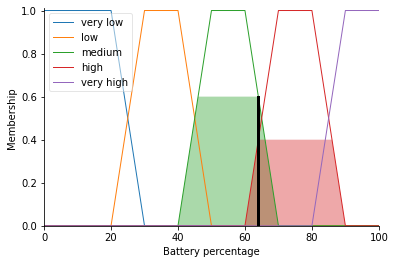

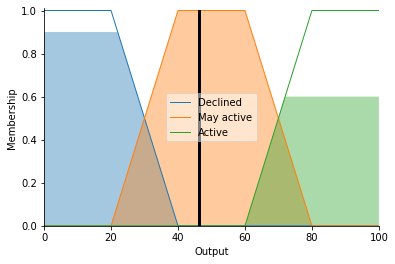

In [31]:
SensorOutput()

execution time: 972
idle time: 865
priority factor: 0.45
battery percentage: 45
chance of activation of sensor: 45.2993%


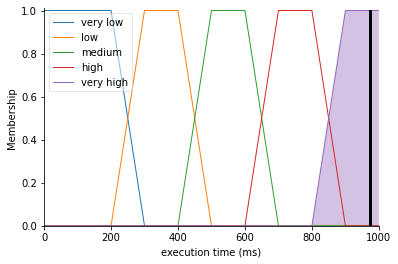

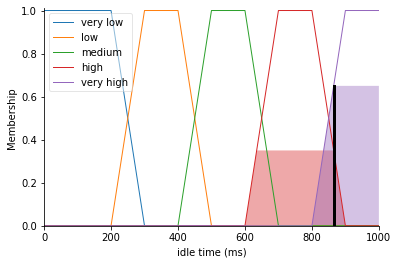

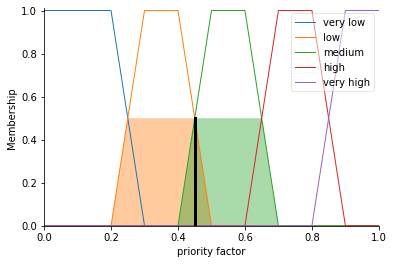

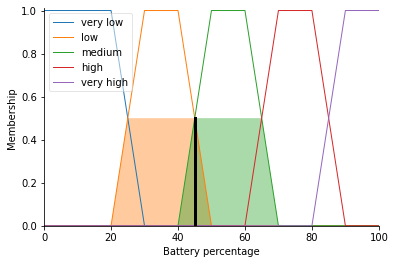

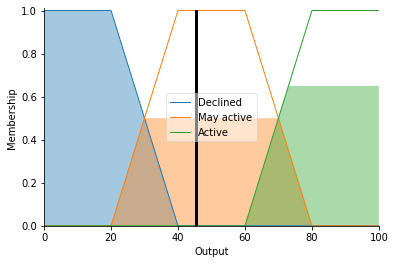

In [32]:
SensorOutput()

execution time: 820
idle time: 890
priority factor: 0.2
battery percentage: 98
chance of activation of sensor: 50%


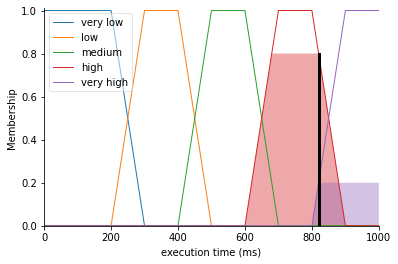

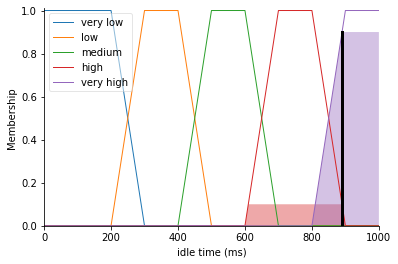

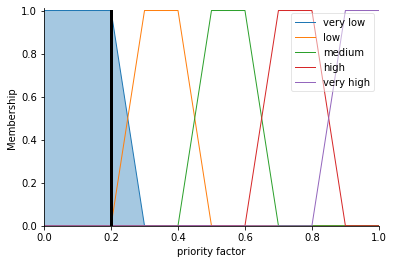

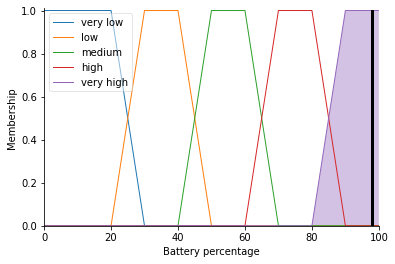

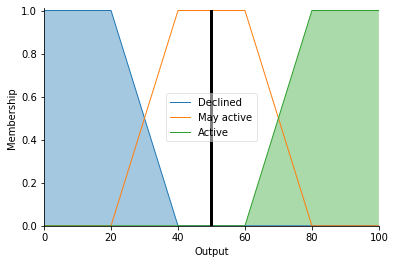

In [37]:
SensorOutput()

execution time: 990
idle time: 800
priority factor: 0.25
battery percentage: 79
chance of activation of sensor: 50%


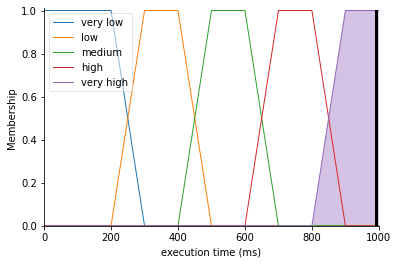

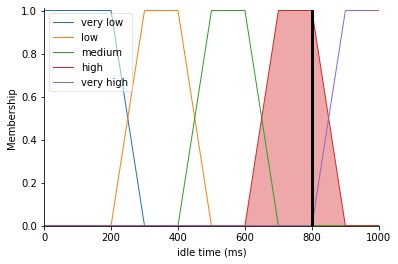

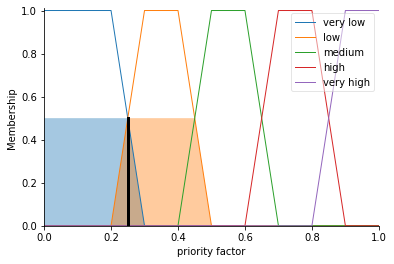

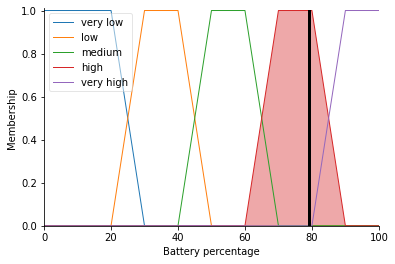

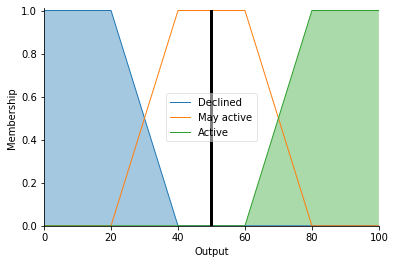

In [38]:
SensorOutput()

execution time: 836
idle time: 910
priority factor: 0.3
battery percentage: 52
chance of activation of sensor: 50%


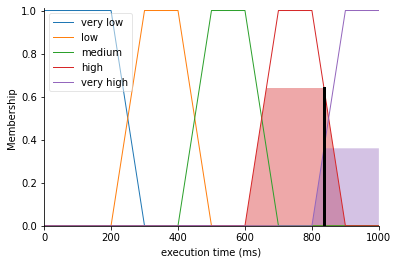

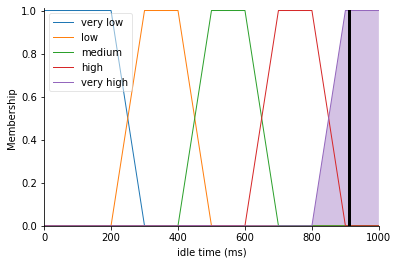

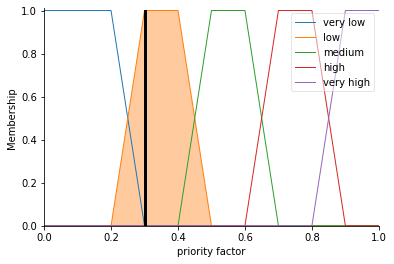

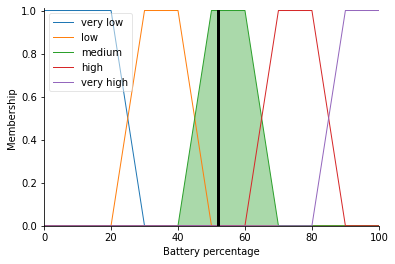

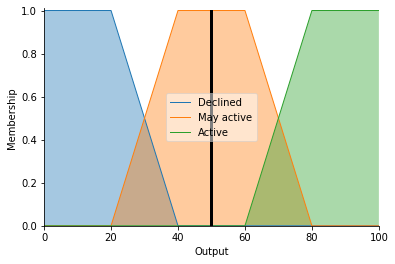

In [39]:
SensorOutput()

execution time: 973
idle time: 864
priority factor: 0.35
battery percentage: 25
chance of activation of sensor: 43.7137%


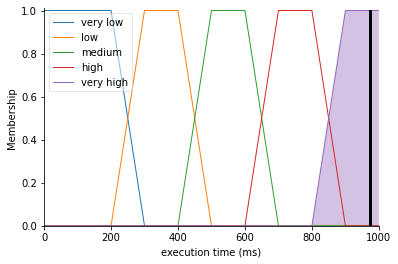

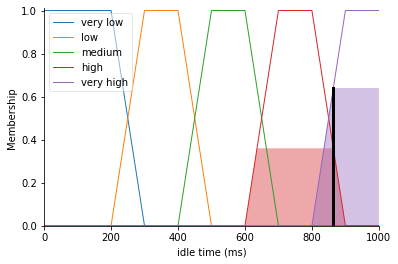

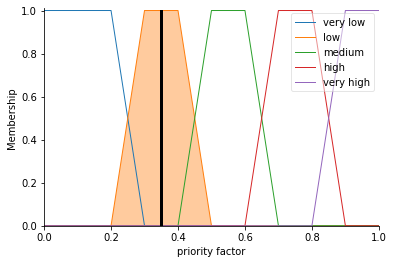

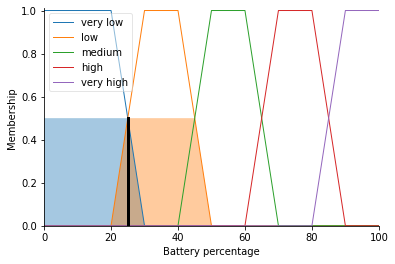

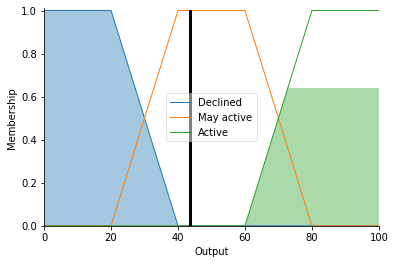

In [40]:
SensorOutput()

execution time: 812
idle time: 862
priority factor: 0.38
battery percentage: 14
chance of activation of sensor: 43.2557%


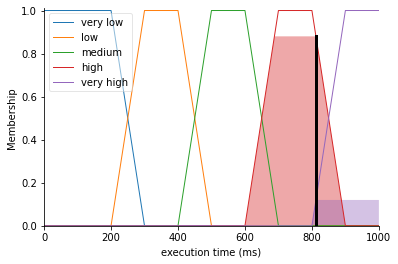

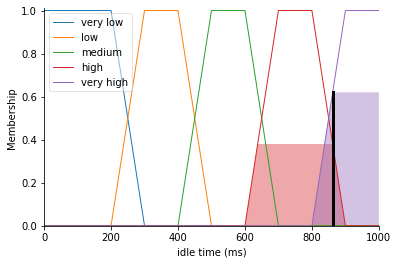

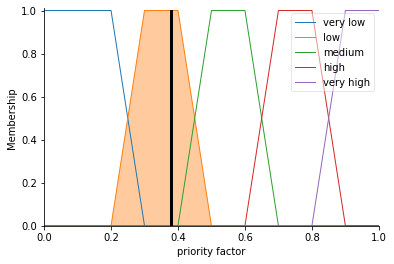

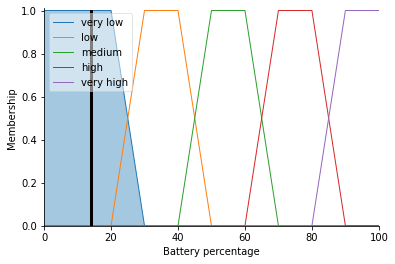

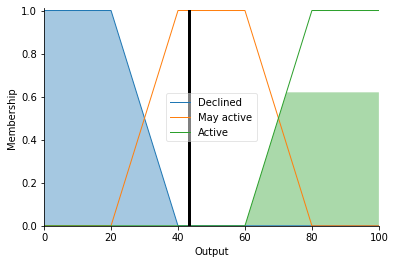

In [41]:
SensorOutput()

execution time: 852
idle time: 973
priority factor: 0.1
battery percentage: 88
chance of activation of sensor: 50%


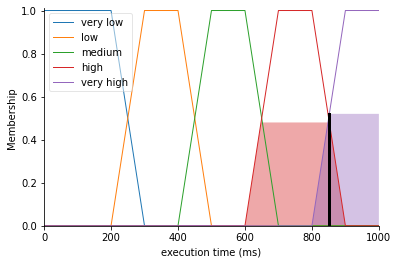

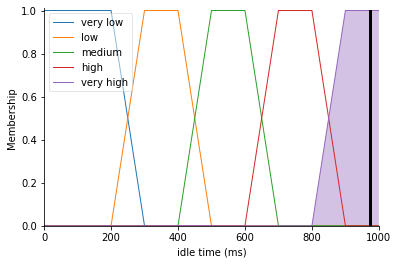

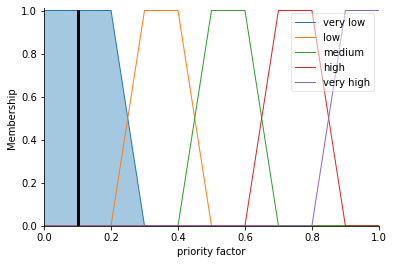

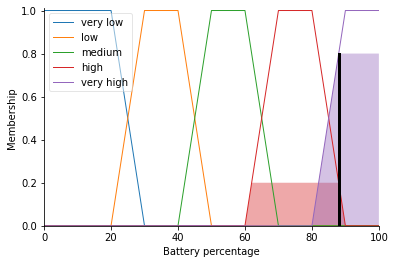

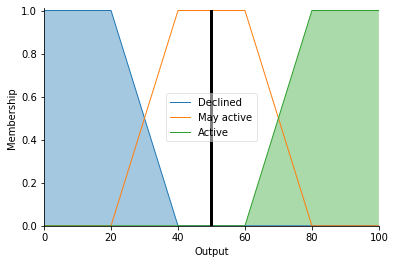

In [42]:
SensorOutput()

execution time: 970
idle time: 860
priority factor: 0.2
battery percentage: 67
chance of activation of sensor: 45.6453%


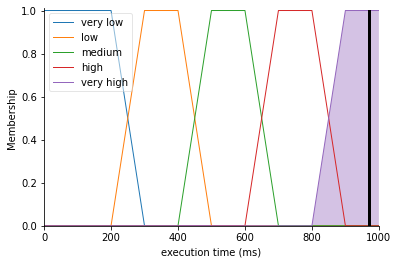

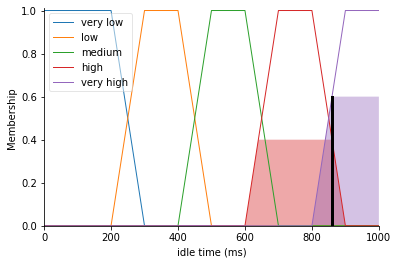

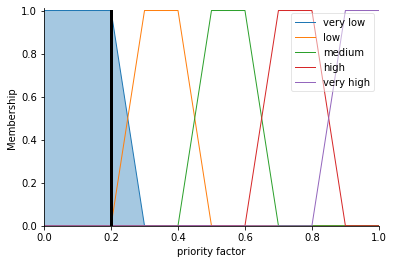

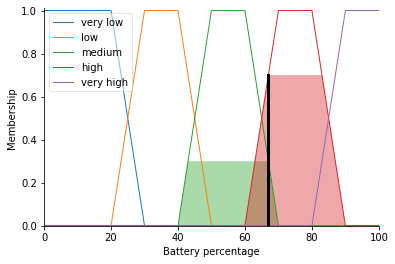

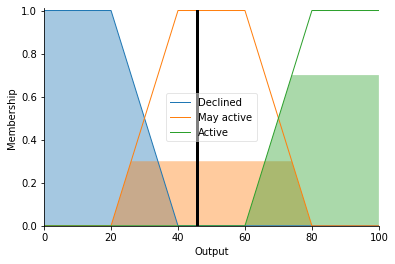

In [43]:
SensorOutput()

execution time: 812
idle time: 927
priority factor: 0.15
battery percentage: 43
chance of activation of sensor: 50%


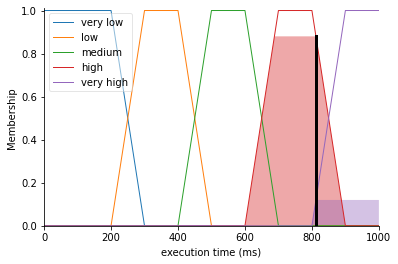

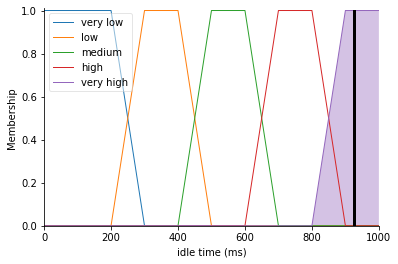

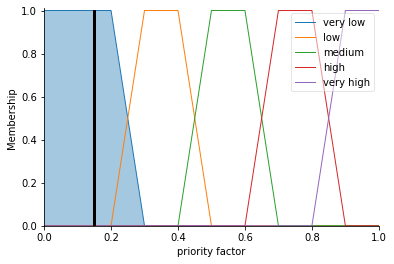

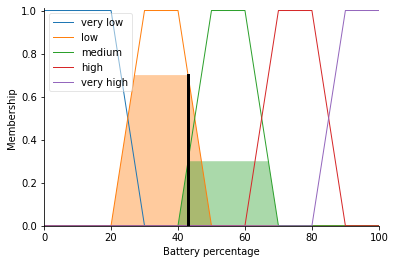

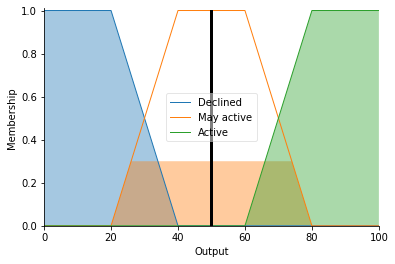

In [44]:
SensorOutput()

execution time: 863
idle time: 821
priority factor: 0.25
battery percentage: 39
chance of activation of sensor: 46.7374%


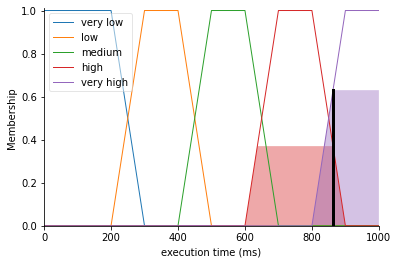

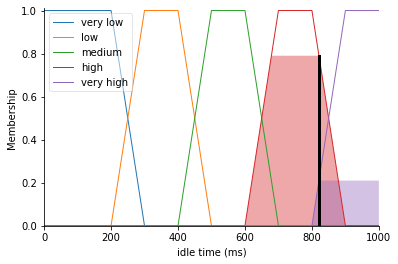

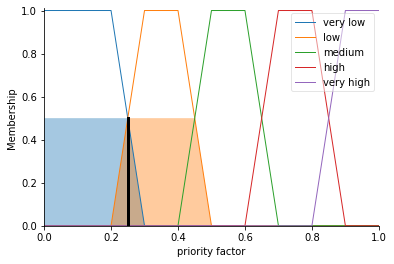

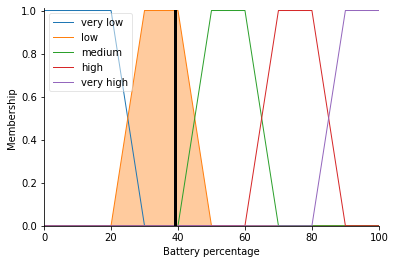

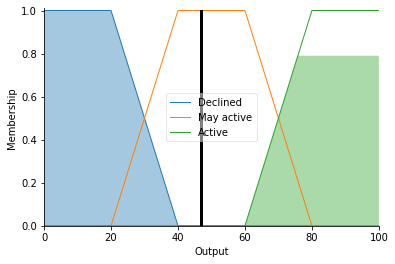

In [45]:
SensorOutput()

execution time: 895
idle time: 810
priority factor: 0.12
battery percentage: 49
chance of activation of sensor: 49.0323%


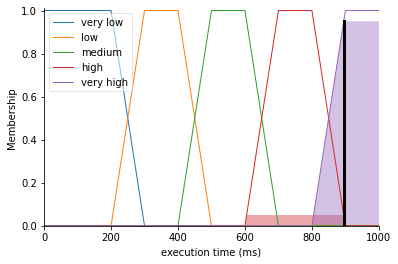

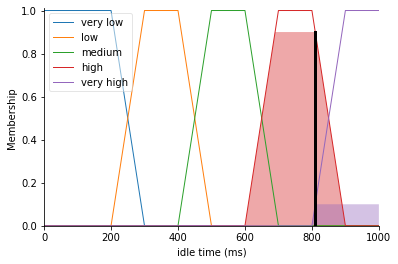

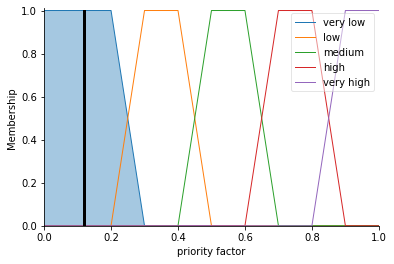

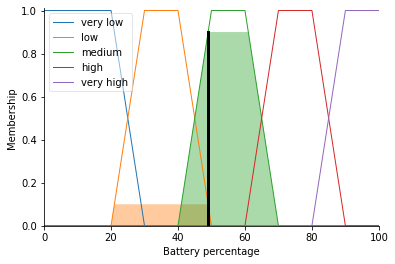

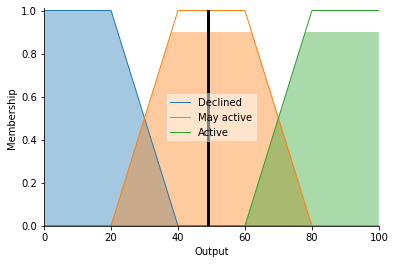

In [46]:
SensorOutput()

execution time: 980
idle time: 780
priority factor: 1
battery percentage: 98
chance of activation of sensor: 50%


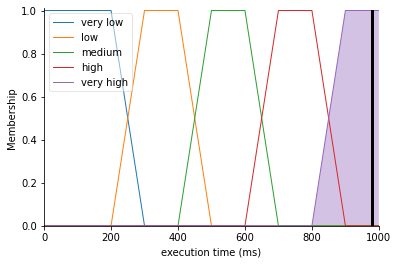

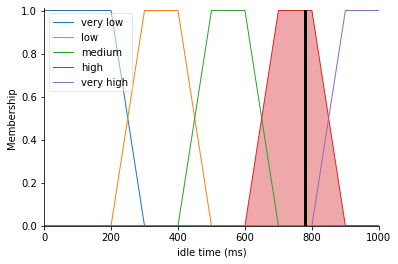

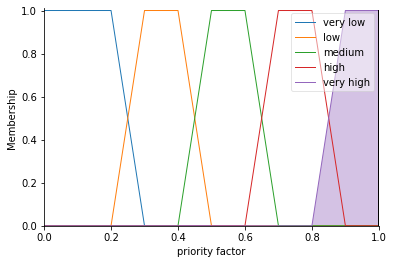

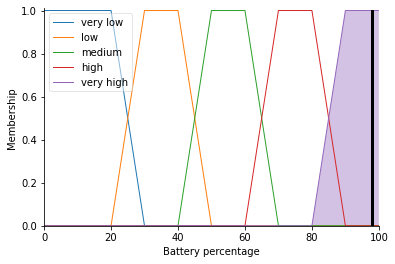

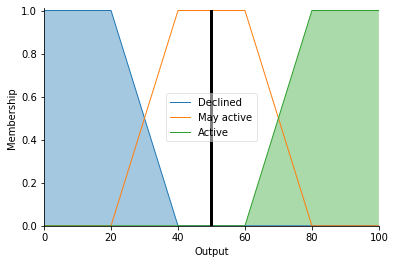

In [47]:
SensorOutput()

execution time: 960
idle time: 745
priority factor: 0.9
battery percentage: 54
chance of activation of sensor: 50%


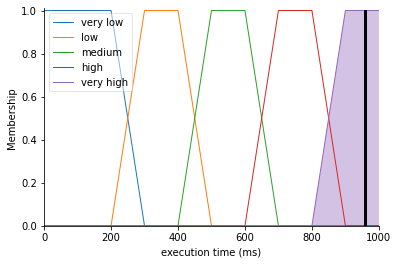

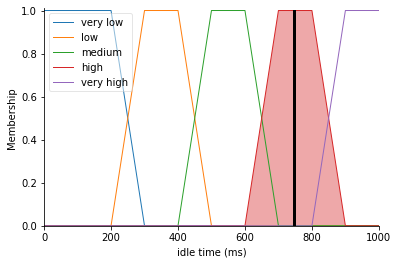

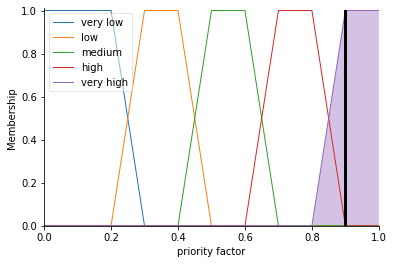

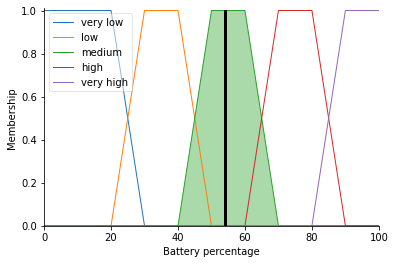

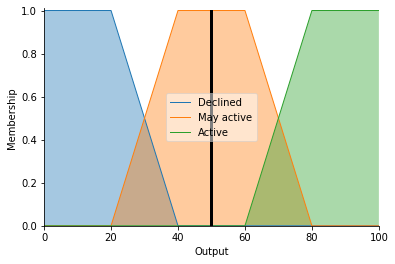

In [48]:
SensorOutput()

execution time: 845
idle time: 625
priority factor: 0.94
battery percentage: 19
chance of activation of sensor: 50%


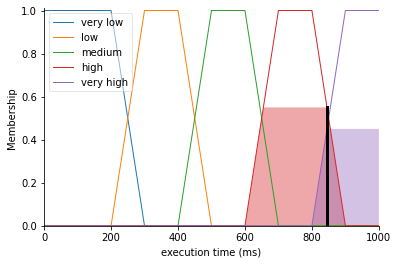

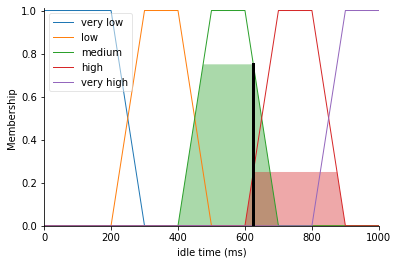

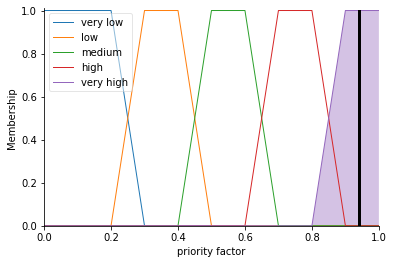

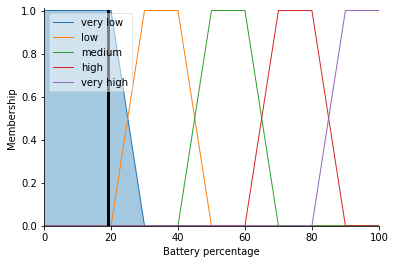

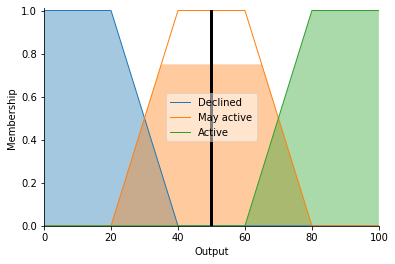

In [49]:
SensorOutput()

execution time: 810
idle time: 746
priority factor: 0.87
battery percentage: 47
chance of activation of sensor: 51.0354%


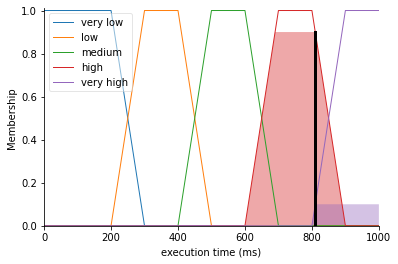

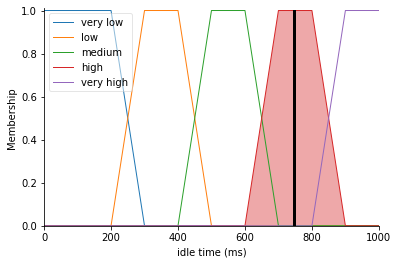

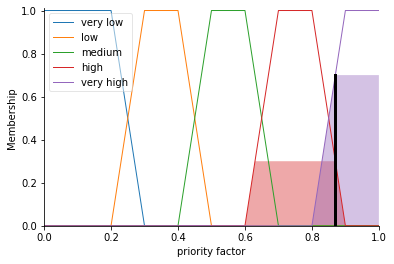

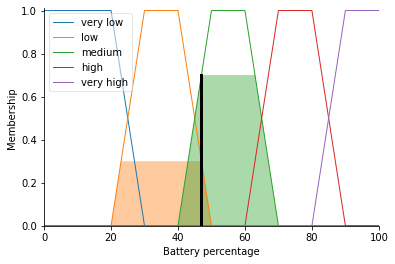

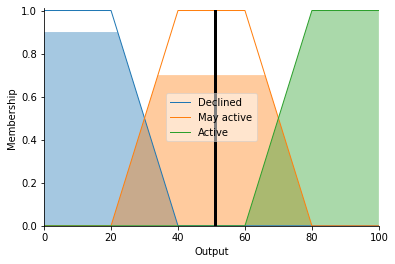

In [50]:
SensorOutput()

execution time: 880
idle time: 600
priority factor: 0.8
battery percentage: 90
chance of activation of sensor: 52.0031%


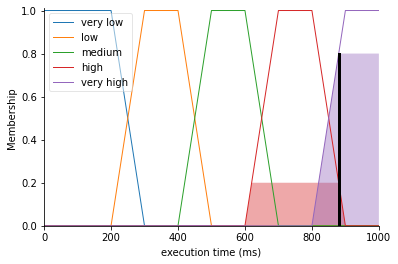

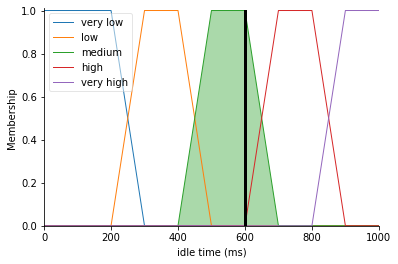

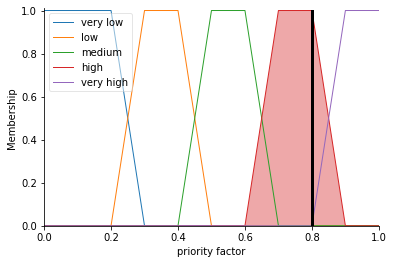

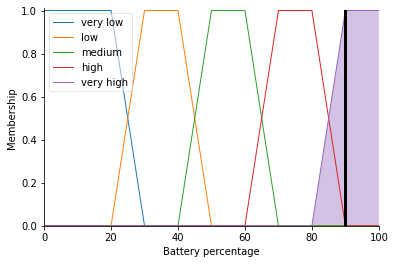

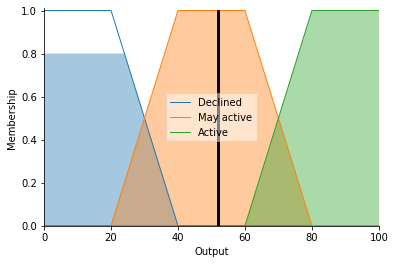

In [51]:
SensorOutput()

execution time: 960
idle time: 660
priority factor: 0.6
battery percentage: 96
chance of activation of sensor: 50%


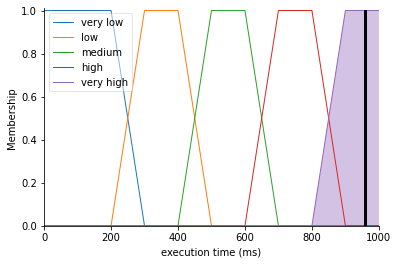

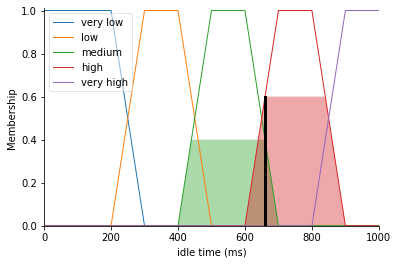

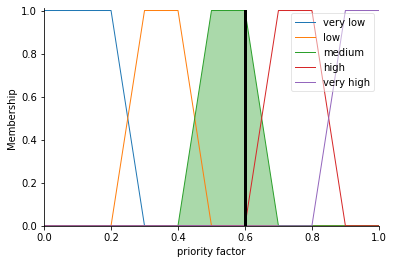

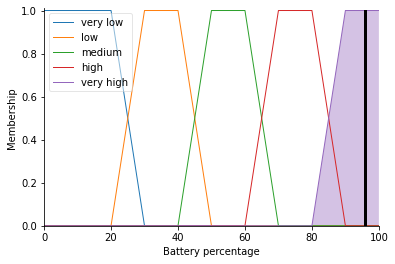

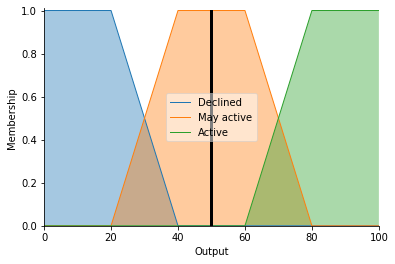

In [52]:
SensorOutput()

execution time: 900
idle time: 610
priority factor: 0.65
battery percentage: 74
chance of activation of sensor: 50%


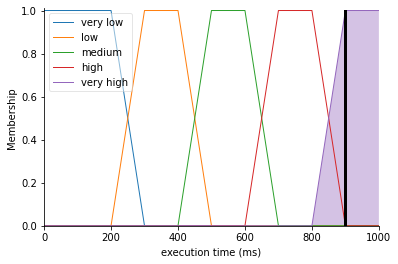

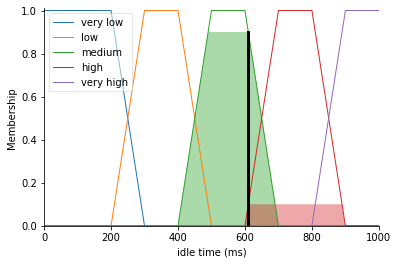

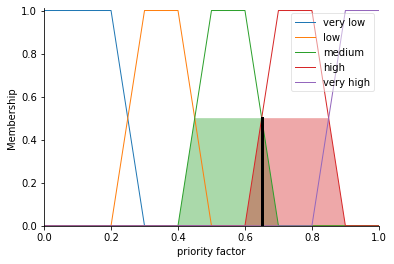

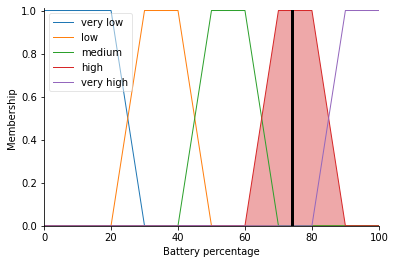

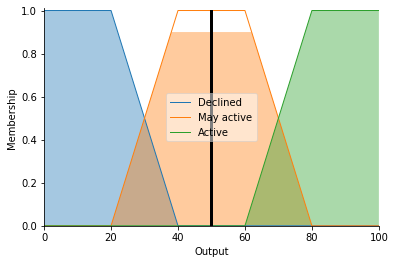

In [53]:
SensorOutput()

execution time: 880
idle time: 710
priority factor: 0.7
battery percentage: 54
chance of activation of sensor: 52.0031%


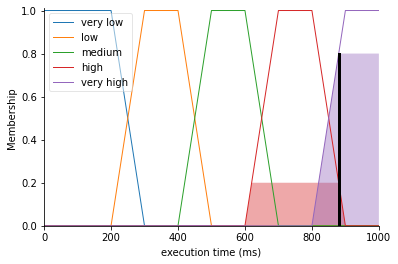

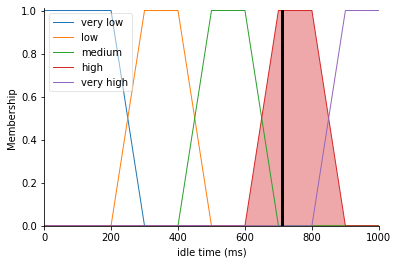

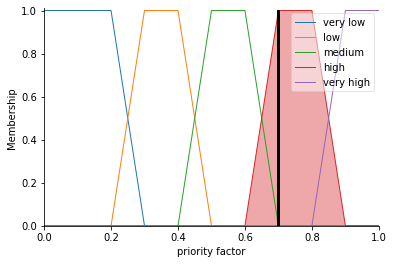

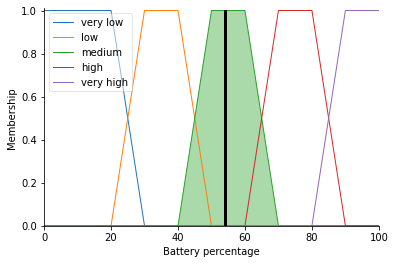

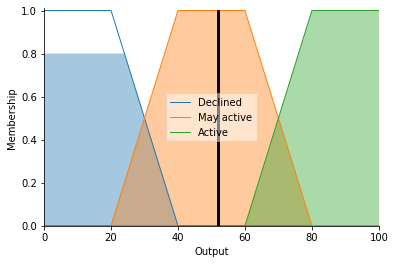

In [54]:
SensorOutput()

execution time: 845
idle time: 725
priority factor: 0.74
battery percentage: 15
chance of activation of sensor: 50%


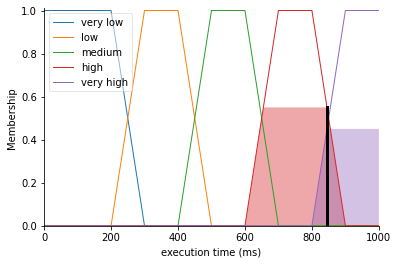

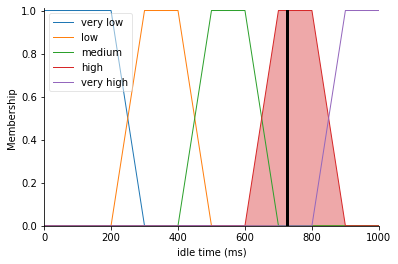

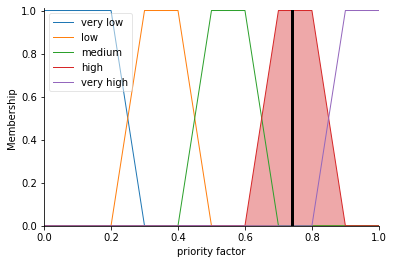

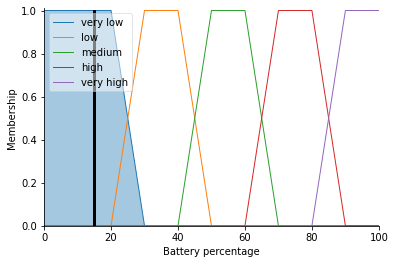

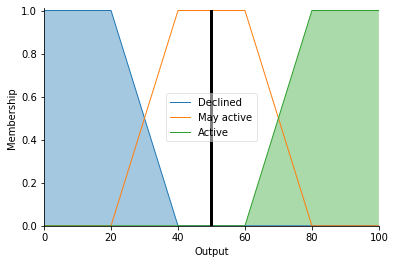

In [55]:
SensorOutput()

execution time: 810
idle time: 795
priority factor: 0.79
battery percentage: 46
chance of activation of sensor: 51.0813%


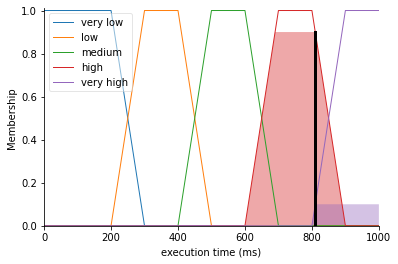

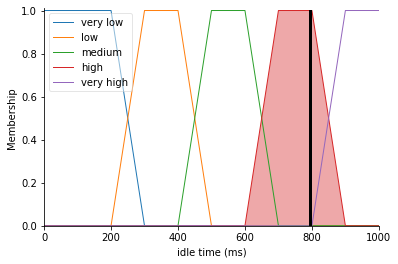

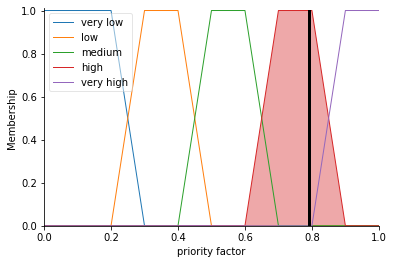

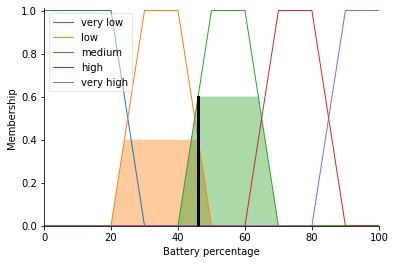

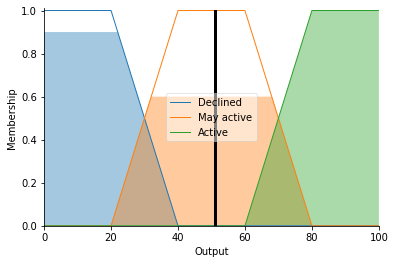

In [56]:
SensorOutput()

execution time: 974
idle time: 784
priority factor: 0.5
battery percentage: 50
chance of activation of sensor: 50%


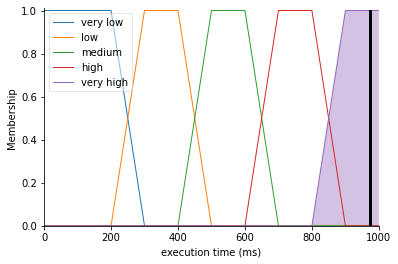

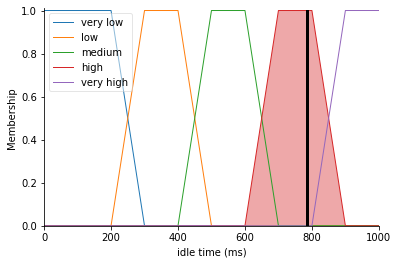

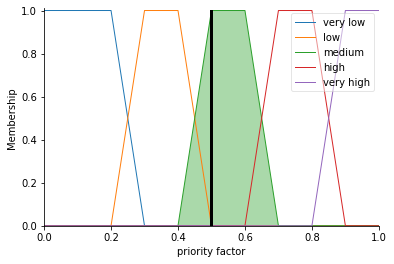

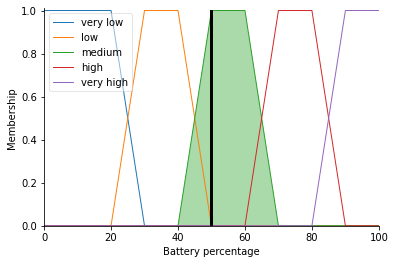

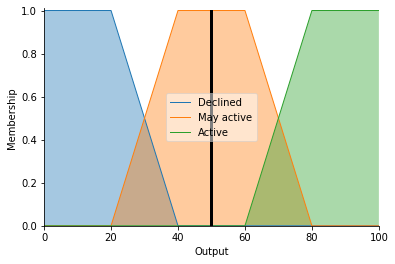

In [57]:
SensorOutput()

execution time: 900
idle time: 700
priority factor: 0.55
battery percentage: 99
chance of activation of sensor: 50%


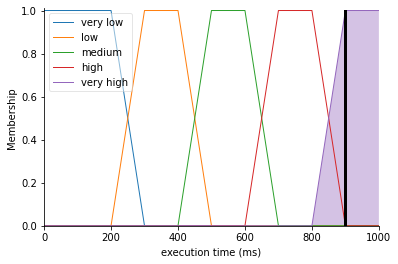

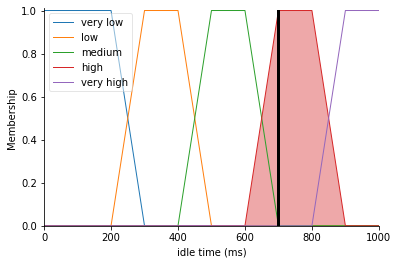

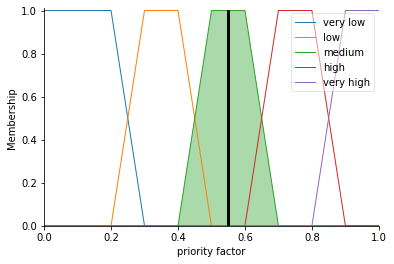

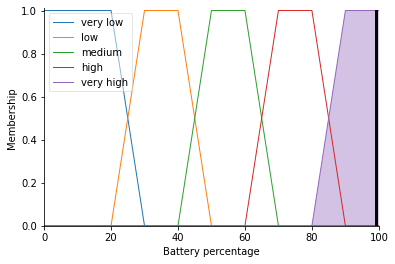

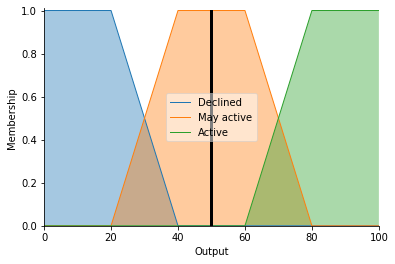

In [58]:
SensorOutput()

execution time: 885
idle time: 654
priority factor: 0.48
battery percentage: 16
chance of activation of sensor: 44.2479%


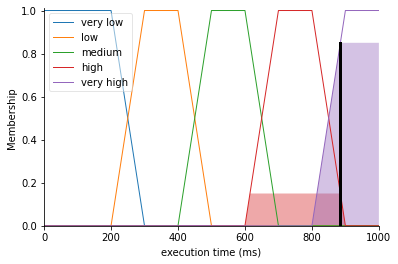

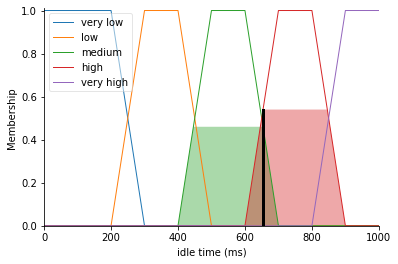

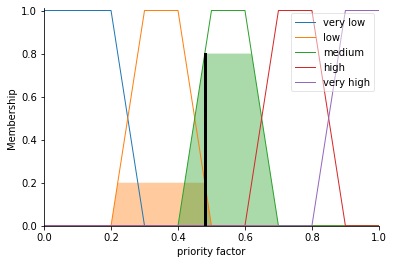

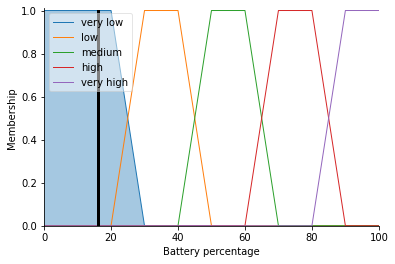

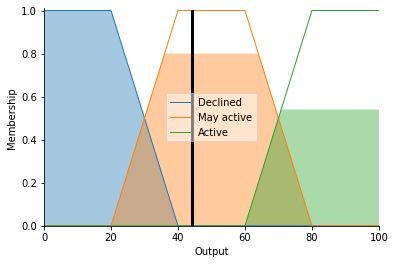

In [59]:
SensorOutput()

execution time: 826
idle time: 990
priority factor: 0.55
battery percentage: 33
chance of activation of sensor: 50%


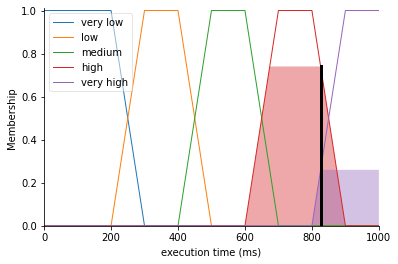

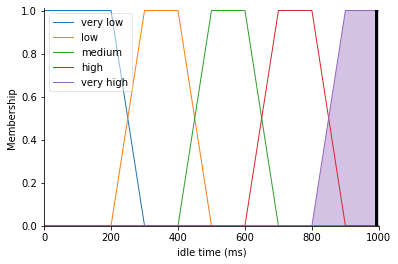

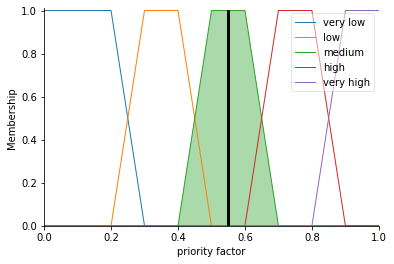

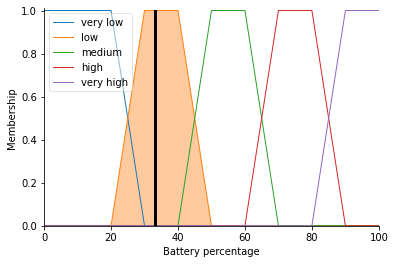

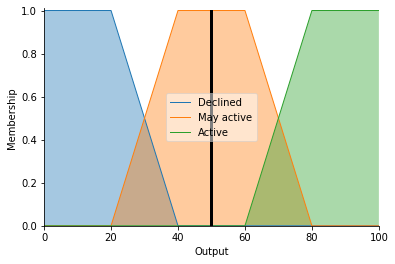

In [36]:
SensorOutput()

execution time: 846
idle time: 617
priority factor: 0.45
battery percentage: 34
chance of activation of sensor: 37.8111%


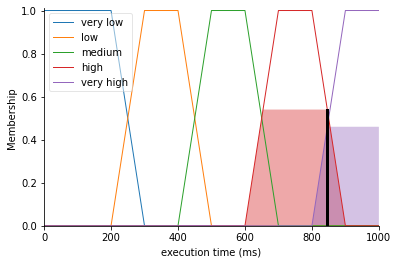

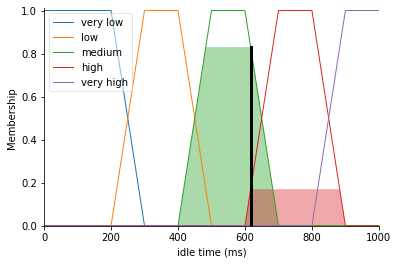

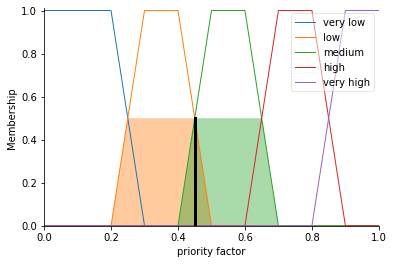

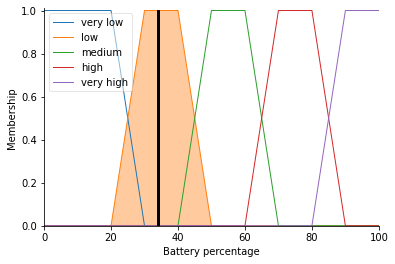

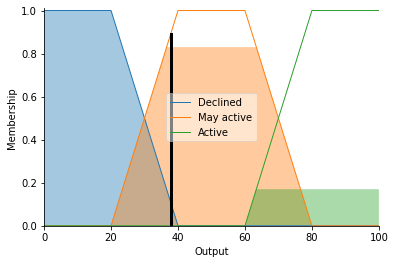

In [60]:
SensorOutput()

execution time: 925
idle time: 625
priority factor: 0.25
battery percentage: 46
chance of activation of sensor: 38.8835%


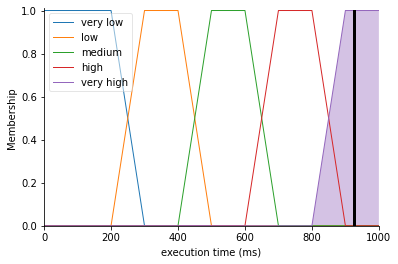

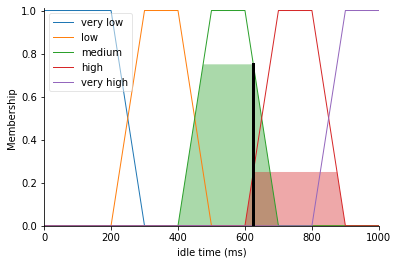

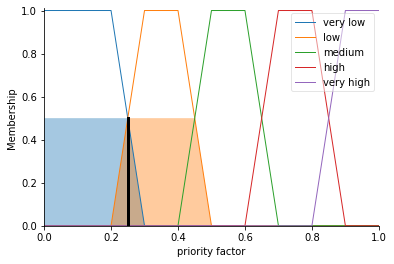

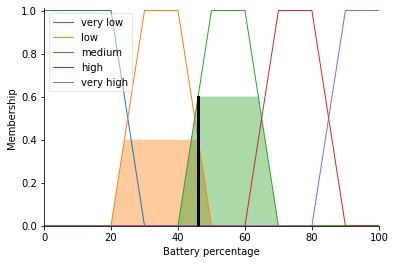

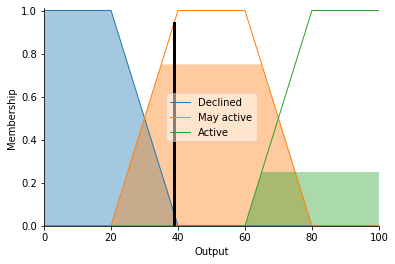

In [61]:
SensorOutput()

execution time: 850
idle time: 979
priority factor: 0.48
battery percentage: 22
chance of activation of sensor: 52.1221%


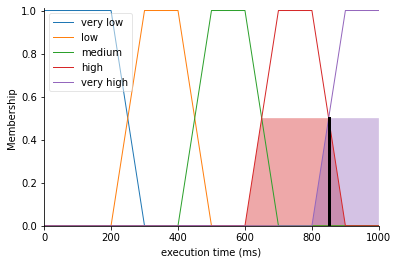

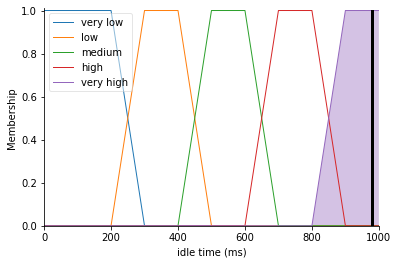

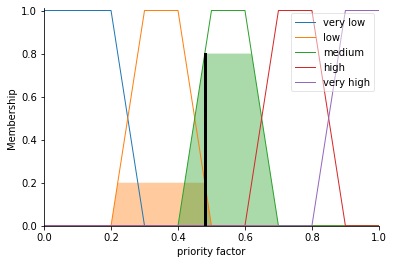

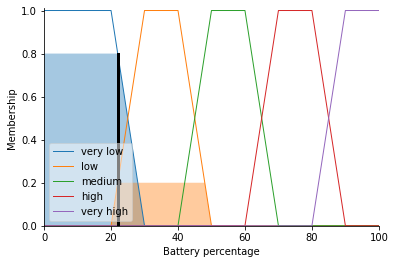

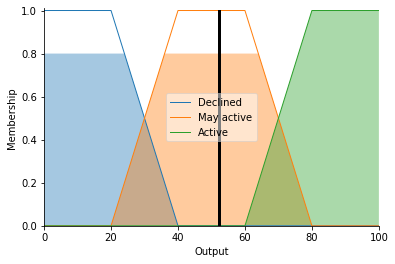

In [35]:
SensorOutput()

execution time: 978
idle time: 678
priority factor: 0.28
battery percentage: 56
chance of activation of sensor: 47.77%


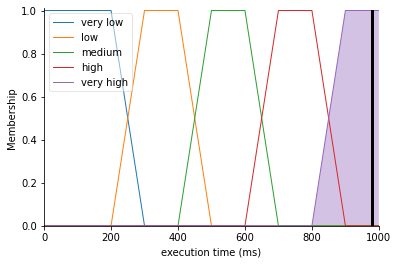

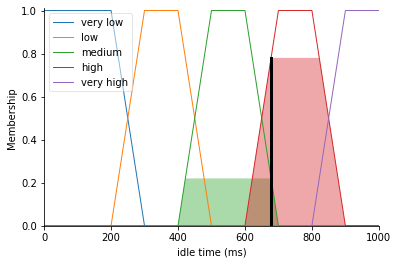

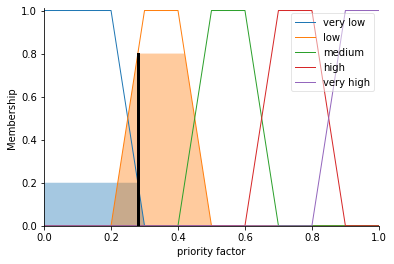

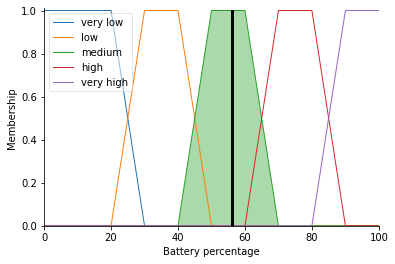

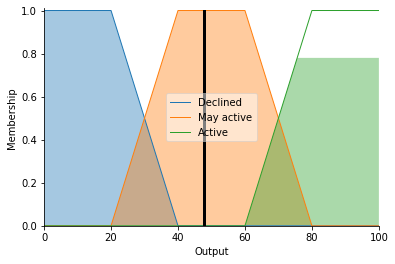

In [62]:
SensorOutput()

execution time: 810
idle time: 710
priority factor: 0.35
battery percentage: 71
chance of activation of sensor: 50%


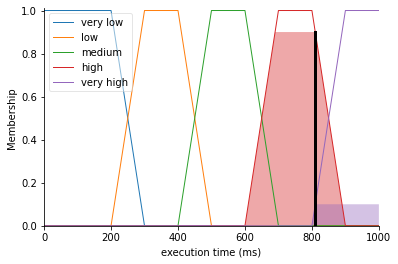

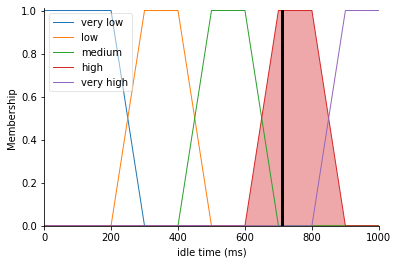

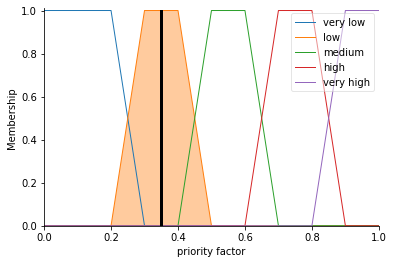

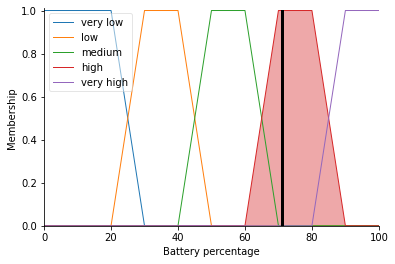

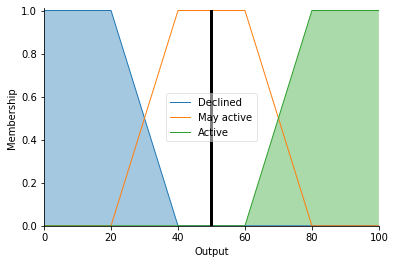

In [63]:
SensorOutput()

execution time: 825
idle time: 725
priority factor: 0.39
battery percentage: 97
chance of activation of sensor: 50%


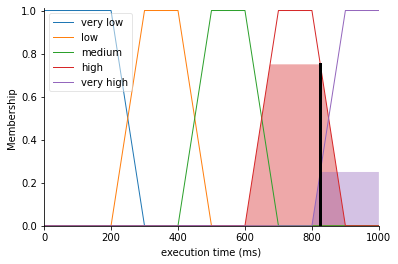

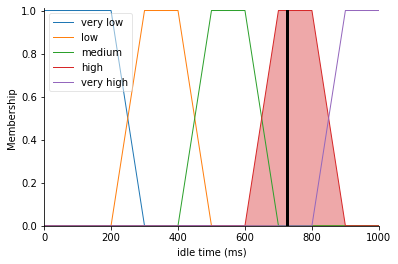

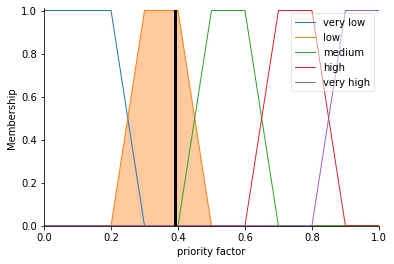

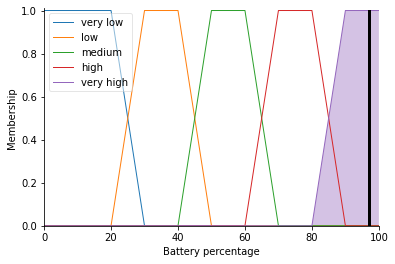

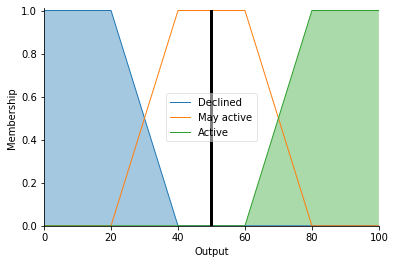

In [64]:
SensorOutput()

execution time: 874
idle time: 774
priority factor: 0.3
battery percentage: 50
chance of activation of sensor: 50%


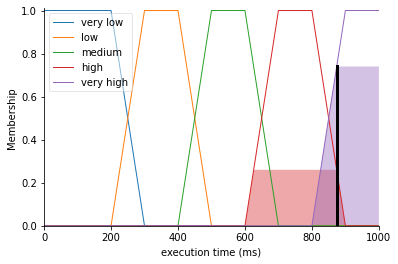

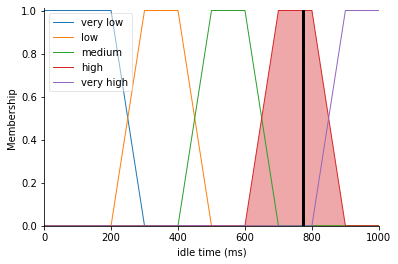

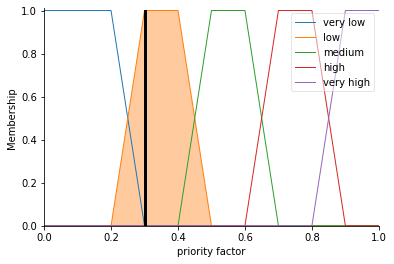

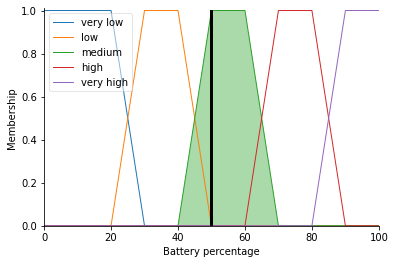

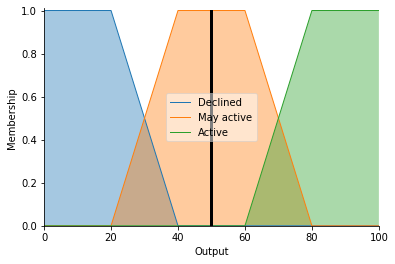

In [68]:
SensorOutput()

execution time: 900
idle time: 700
priority factor: 0.39
battery percentage: 95
chance of activation of sensor: 50%


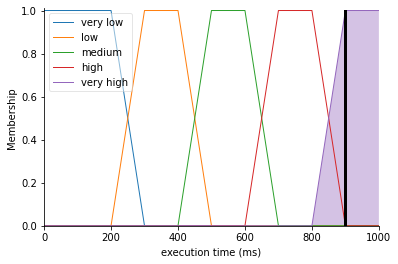

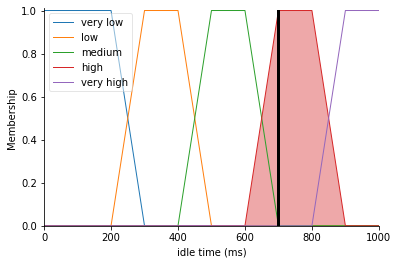

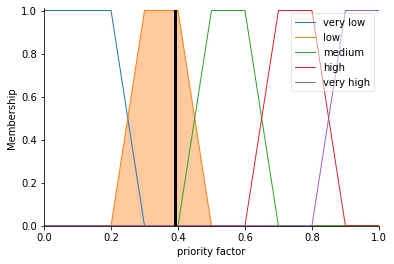

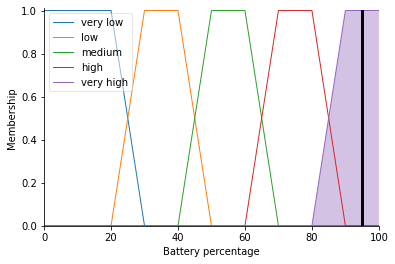

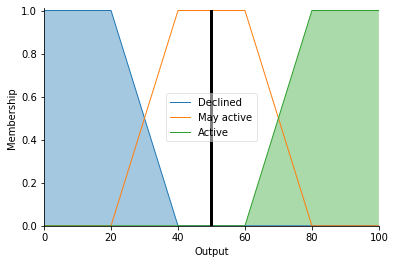

In [69]:
SensorOutput()

execution time: 950
idle time: 750
priority factor: 0.15
battery percentage: 45
chance of activation of sensor: 50%


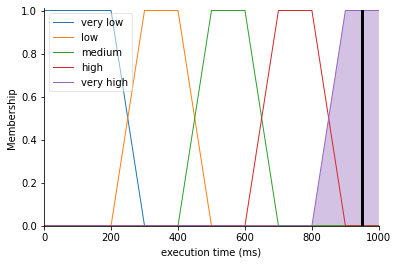

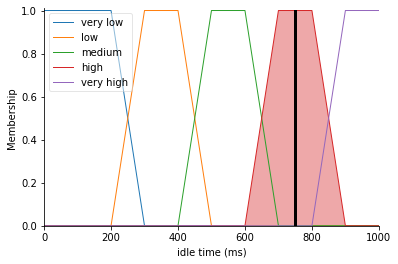

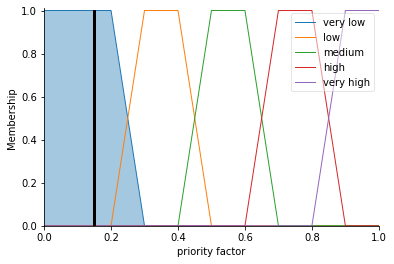

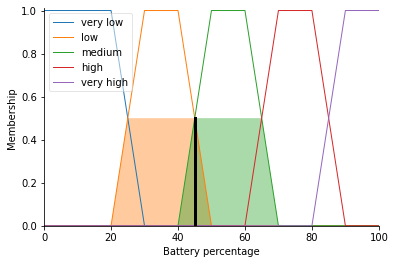

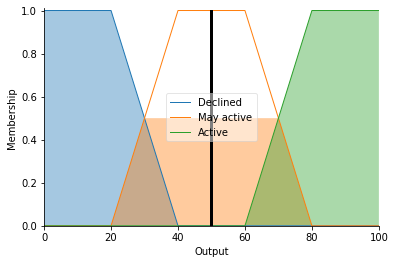

In [70]:
SensorOutput()

execution time: 850
idle time: 650
priority factor: 0.1
battery percentage: 20
chance of activation of sensor: 42.5333%


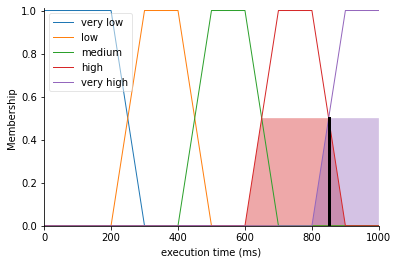

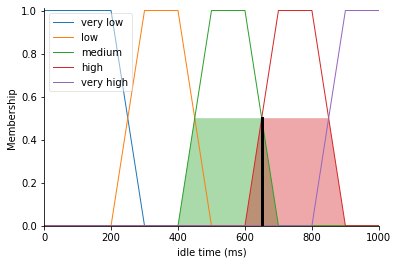

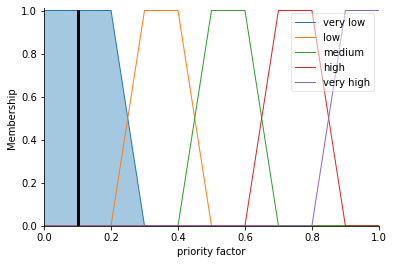

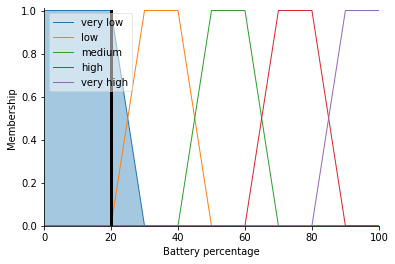

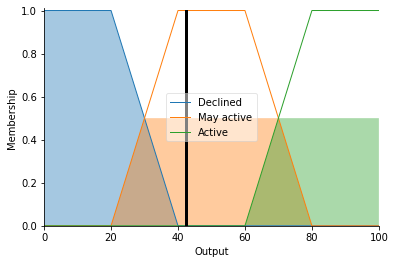

In [71]:
SensorOutput()

execution time: 800
idle time: 600
priority factor: 0.16
battery percentage: 41
chance of activation of sensor: 35.641%


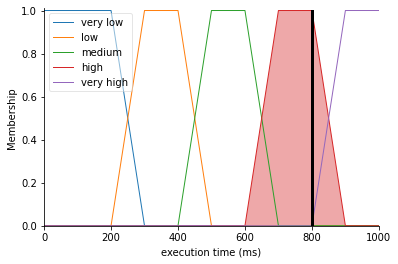

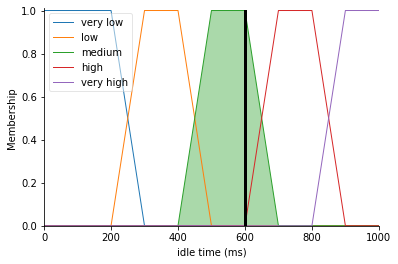

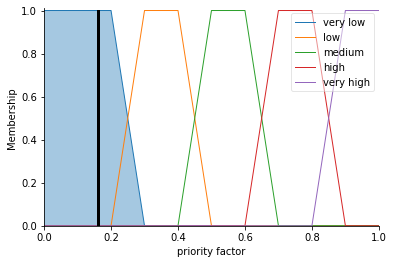

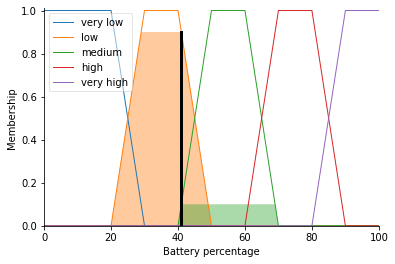

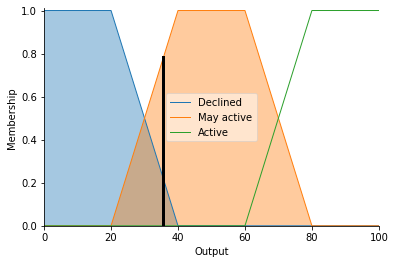

In [72]:
SensorOutput()

execution time: 912
idle time: 672
priority factor: 0.17
battery percentage: 78
chance of activation of sensor: 50%


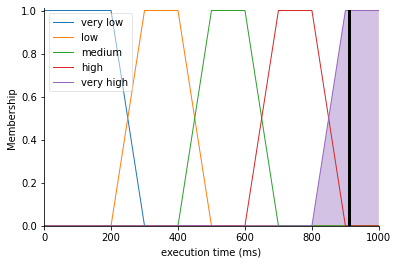

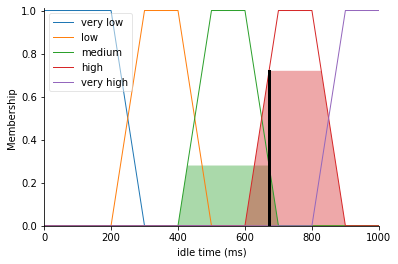

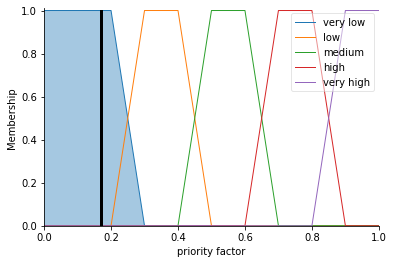

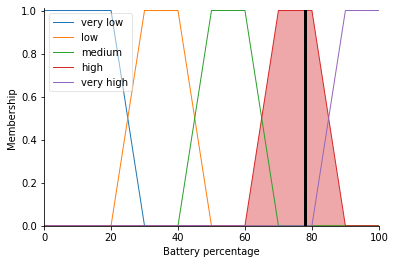

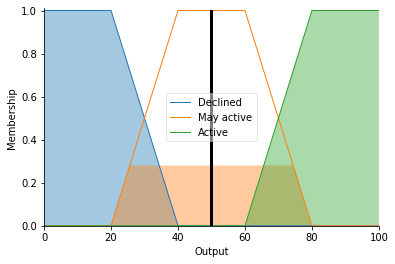

In [73]:
SensorOutput()

execution time: 845
idle time: 745
priority factor: 0.12
battery percentage: 64
chance of activation of sensor: 50%


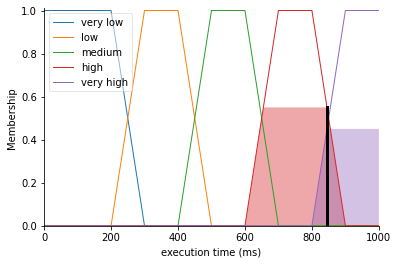

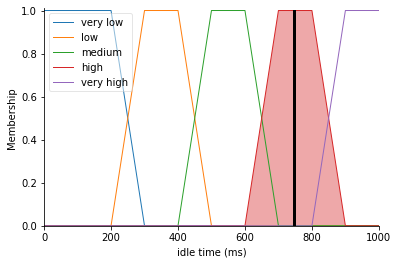

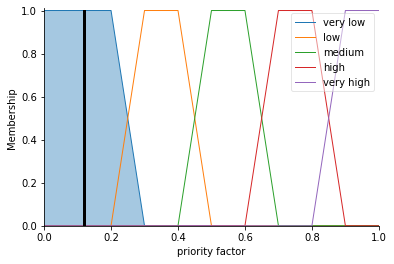

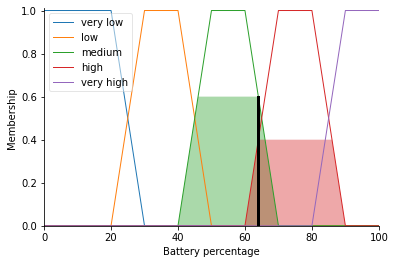

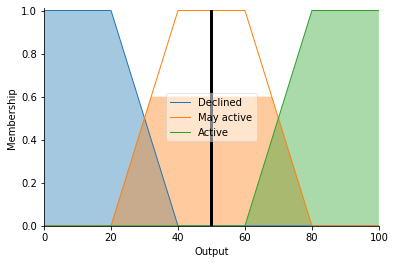

In [74]:
SensorOutput()

execution time: 990
idle time: 400
priority factor: 1
battery percentage: 95
chance of activation of sensor: 50%


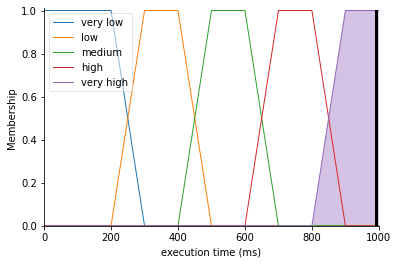

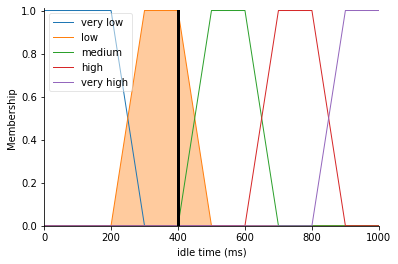

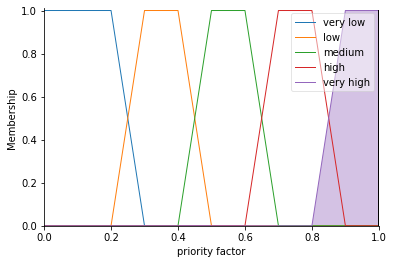

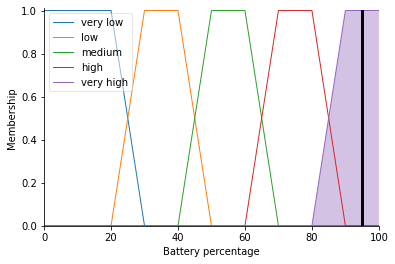

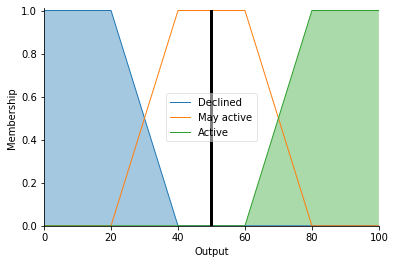

In [75]:
SensorOutput()

execution time: 890
idle time: 490
priority factor: 0.9
battery percentage: 55
chance of activation of sensor: 50.9435%


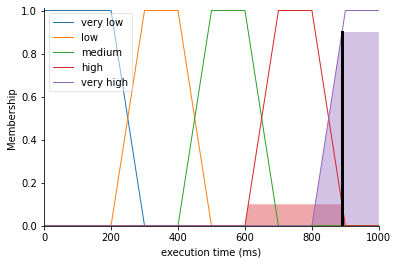

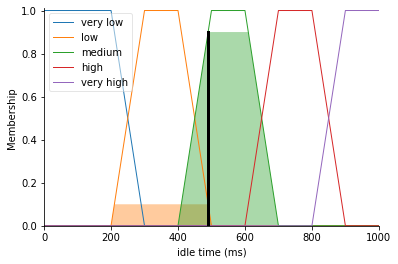

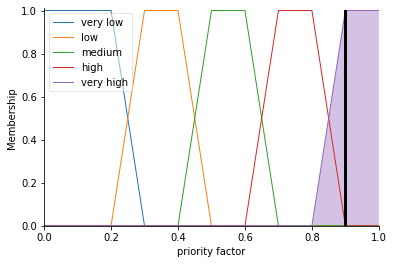

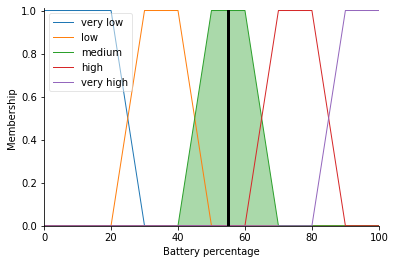

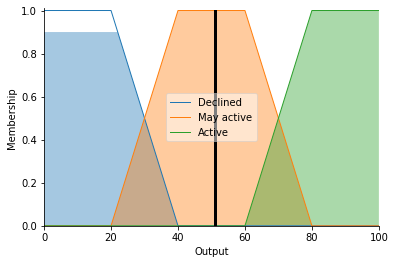

In [77]:
SensorOutput()

execution time: 850
idle time: 530
priority factor: 0.87
battery percentage: 35
chance of activation of sensor: 46.8087%


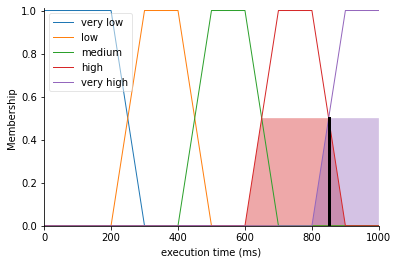

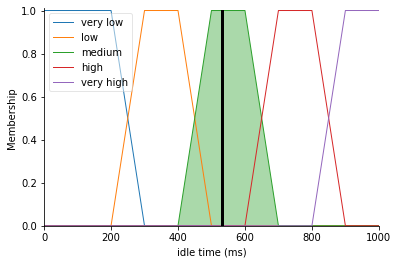

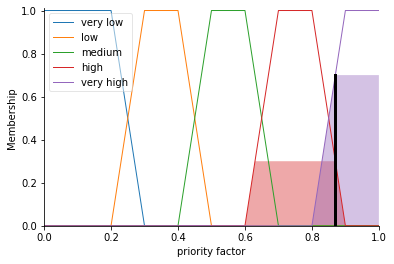

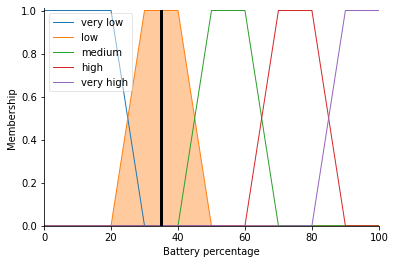

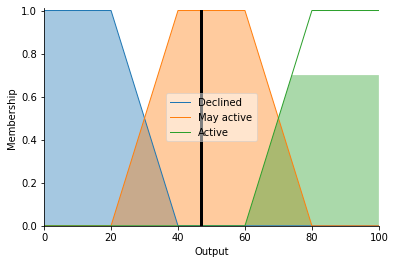

In [78]:
SensorOutput()

execution time: 800
idle time: 590
priority factor: 0.82
battery percentage: 15
chance of activation of sensor: 47.9969%


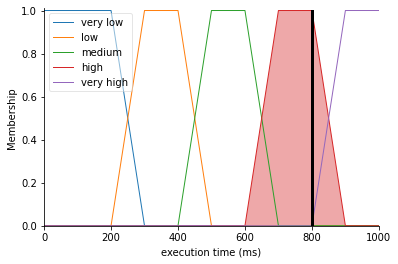

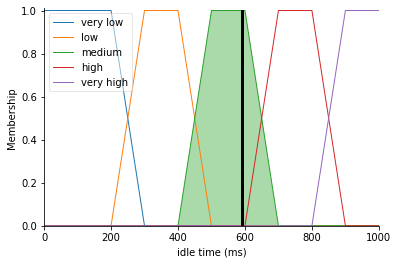

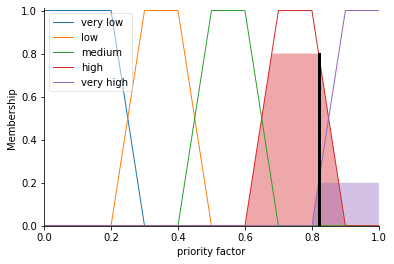

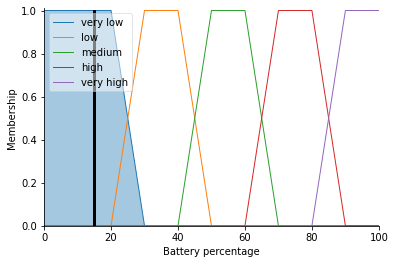

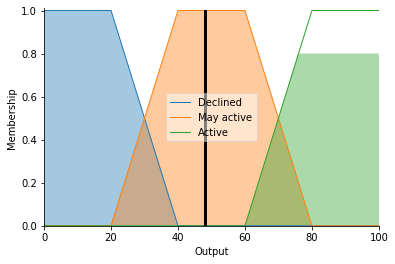

In [79]:
SensorOutput()

execution time: 940
idle time: 440
priority factor: 0.95
battery percentage: 75
chance of activation of sensor: 50%


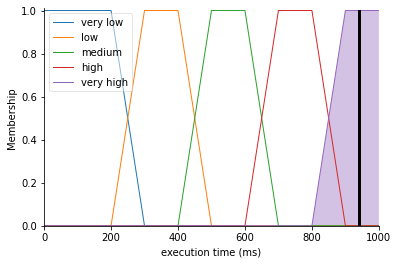

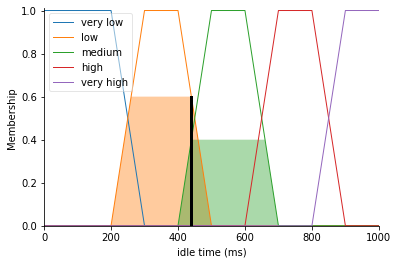

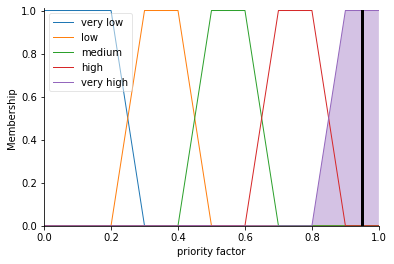

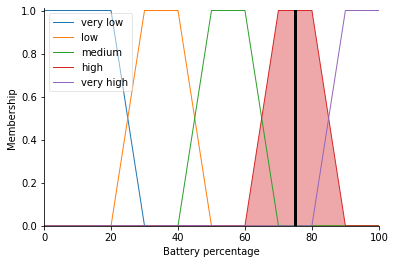

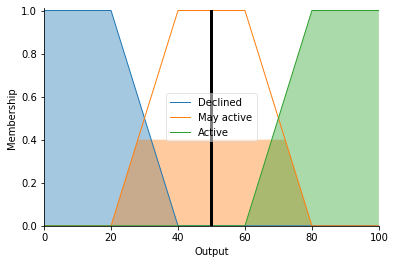

In [76]:
SensorOutput()

execution time: 995
idle time: 405
priority factor: 0.8
battery percentage: 96
chance of activation of sensor: 50%


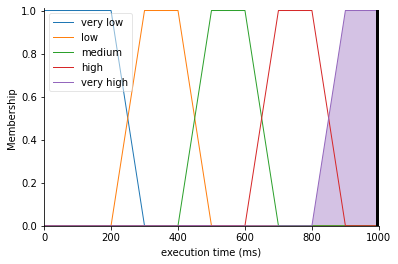

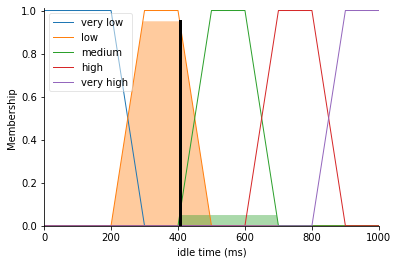

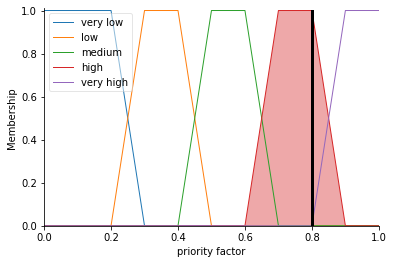

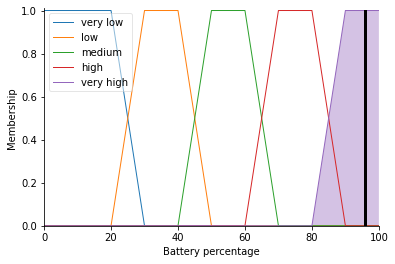

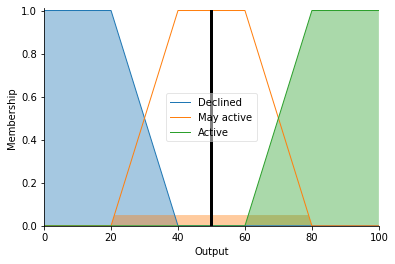

In [80]:
SensorOutput()

execution time: 945
idle time: 445
priority factor: 0.75
battery percentage: 76
chance of activation of sensor: 50%


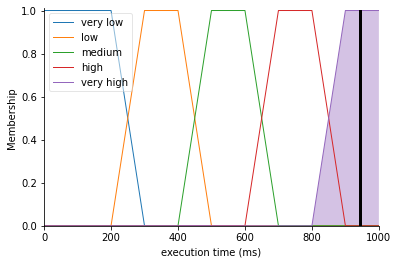

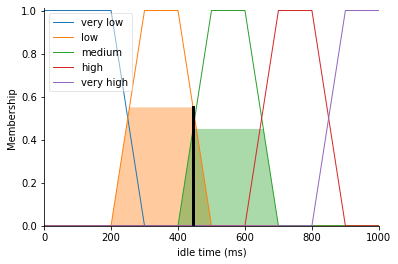

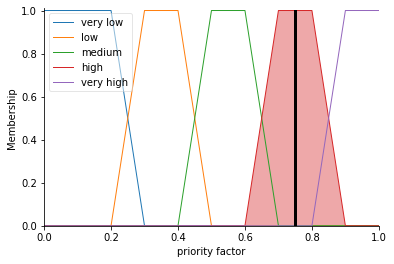

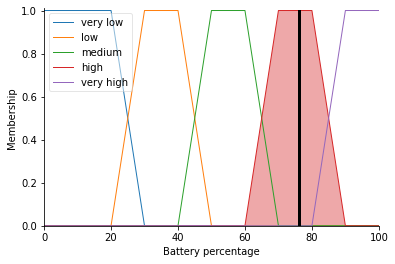

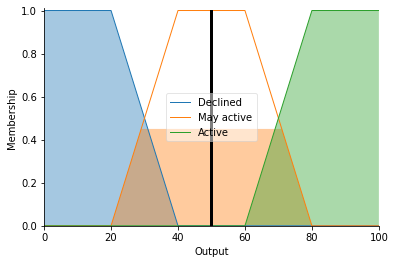

In [81]:
SensorOutput()

execution time: 895
idle time: 495
priority factor: 0.7
battery percentage: 56
chance of activation of sensor: 50.4579%


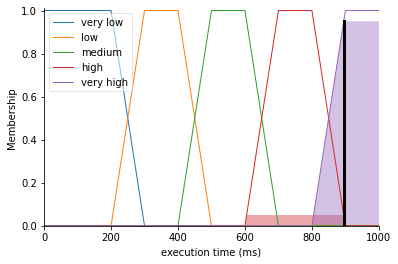

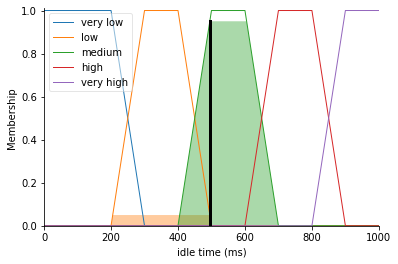

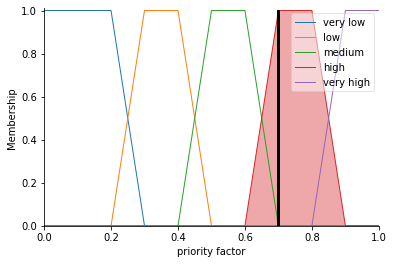

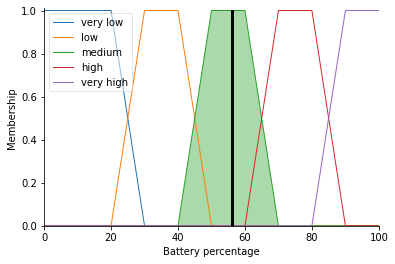

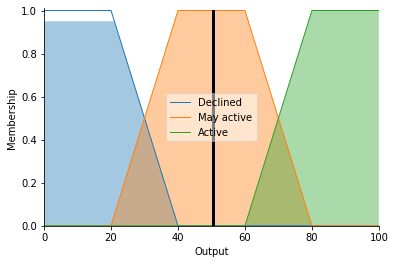

In [82]:
SensorOutput()

execution time: 855
idle time: 535
priority factor: 0.67
battery percentage: 36
chance of activation of sensor: 46.8087%


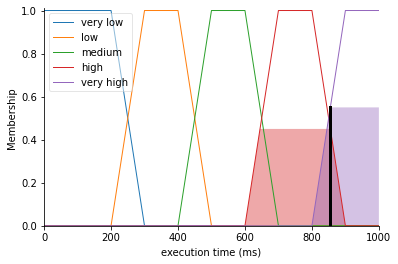

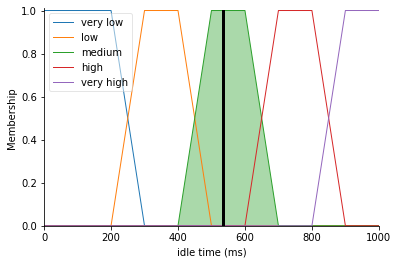

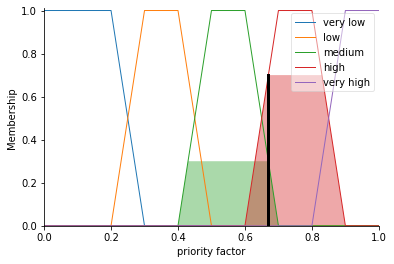

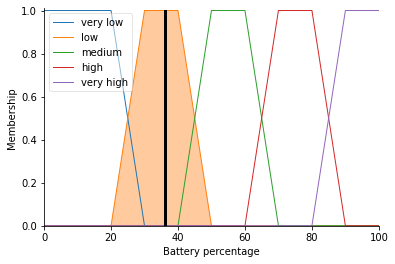

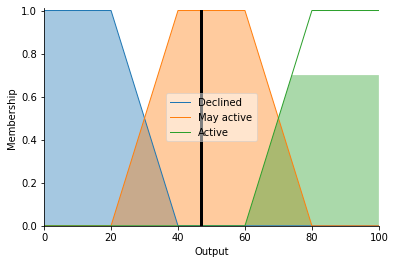

In [83]:
SensorOutput()

execution time: 805
idle time: 595
priority factor: 0.62
battery percentage: 16
chance of activation of sensor: 39.0221%


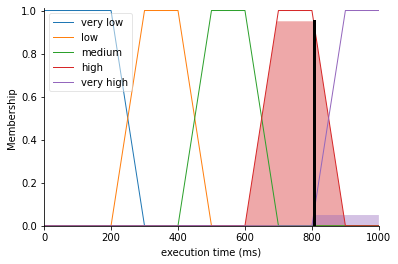

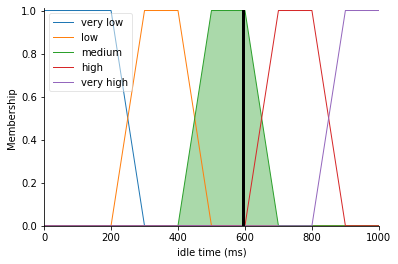

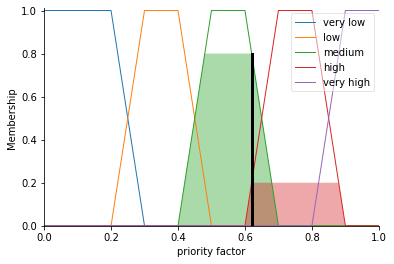

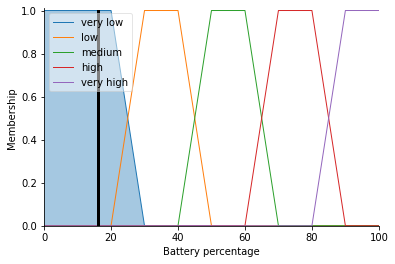

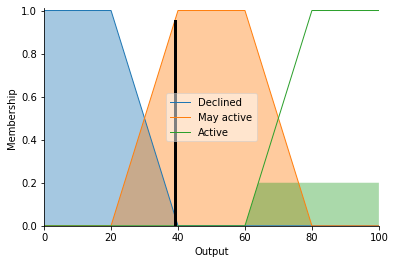

In [84]:
SensorOutput()

execution time: 950
idle time: 50
priority factor: 0.1
battery percentage: 10
chance of activation of sensor: 15.5556%


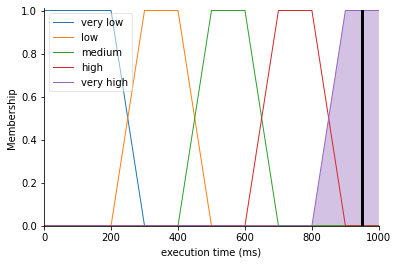

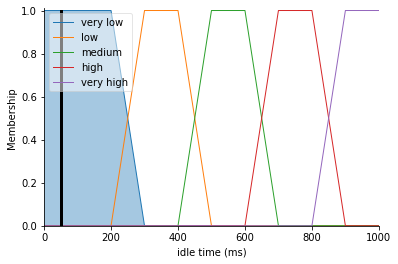

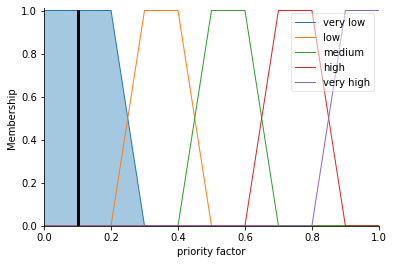

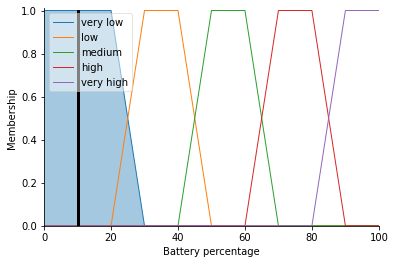

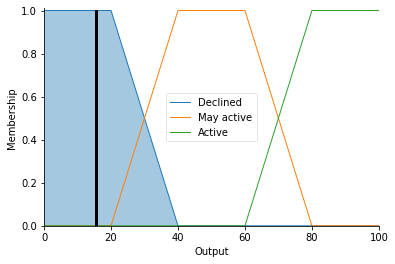

In [ ]:
SensorOutput()